# Make a new set of decoys for PPI decoy discrimination

## Import `Python` modules

In [1]:
import os
import sys
import pandas
import glob
import random
import re
import shutil
import math
import subprocess
import time
import numpy as np
import scipy.stats
import umap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2, style='ticks', palette='colorblind')

# custom modules
sys.path.append('scripts/')
import design_utils

resultsdir = '/net/scratch/haddox/2021/ppi_benchmark/results'
if not os.path.isdir(resultsdir):
    os.makedirs(resultsdir)

Define energy functions

In [2]:
e_functions_dict = {
    'talaris2014': (
        '/home/haddox/2019/optE_eval/data/talaris2014_cart.wts',
        '/home/haddox/2019/optE_eval/data/talaris2014_flags',
        []
    ),
    'ref2015': (
        '/home/haddox/2019/optE_eval/data/ref2015_cart.wts',
        '/home/haddox/2019/optE_eval/data/ref2015_flags',
        []
    ),
    
    'beta_nov16' : (
        'beta_nov16_cart', # weights
        None, # flags
        ['-beta_nov16_cart'] # extra args
    ),
    
    
    
    'beta16' : (
        '/home/haddox/2019/optE_eval/data/beta16.nostab-refit_cart.wts',
        '/home/haddox/2019/optE_eval/data/flags_beta16',
        []
    ),
    'beta16_plus_hpsc_lj_changes' : (
        '/home/haddox/2019/optE_eval/data/beta16_plus_lj_changes.wts',
        '/home/haddox/2019/optE_eval/data/beta16_plus_hpsc_lj_changes_flags',
        []
    ),
    
    'beta_jan22' : (
        '/home/haddox/2019/optE_eval/data/beta_jan22_cart.wts',
        '/home/haddox/2019/optE_eval/data/beta_jan22_flags',
        []
    ),
    'HH_run25A_step480' : (
        '/home/haddox/2019/optE_eval/data/HH_run25A_weights_480.wts',
        '/home/haddox/2019/optE_eval/data/HH_run25A_flags_480',
        []
    ),
    
    'HH_run23A_step384' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384',
        []
    ),
    'HH_run23A_step384_1a' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_1a',
        []
    ),
    'HH_run23A_step384_1c' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_1c',
        []
    ),
    'HH_run23A_step384_1d' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_1d',
        []
    ),
    'HH_run23A_step384_1e' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_1e',
        []
    ),
    'HH_run23A_step384_1f' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_1f',
        []
    ),
    'HH_run23A_step384_dd2_elec_1a' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_dd2_elec_1a',
        []
    ),
    'HH_run23A_step384_dd2_elec_1b' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_dd2_elec_1b',
        []
    ),
    'HH_run23A_step384_dd2_elec_1d' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_dd2_elec_1d',
        []
    ),
    'HH_run23A_step384_dd_elec_1a' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_dd_elec_1a',
        []
    ),
    'HH_run23A_step384_dd_elec_1b' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_dd_elec_1b',
        []
    ),
    'HH_run23A_step384_dd_elec_1c' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_dd_elec_1c',
        []
    ),
    'HH_run23A_step384_dd_elec_1d' : (
        '/home/haddox/2019/optE_eval/data/HH_run23A_weights_384.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23A_flags_384_dd_elec_1d',
        []
    ),
    'HH_run23B_sol_elec_dd2_simple_step169' : (
        '/home/haddox/2019/optE_eval/data/HH_run23B_sol_elec_dd2_simple_weights_169.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23B_sol_elec_dd2_simple_flags_169',
        []
    ),
    'HH_run23B_sol_elec_dd2_simple_step169_1d' : (
        '/home/haddox/2019/optE_eval/data/HH_run23B_sol_elec_dd2_simple_weights_169.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23B_sol_elec_dd2_simple_flags_169_1d',
        []
    ),
    'HH_run23B_sol_elec_dd2_simple_step169_1e' : (
        '/home/haddox/2019/optE_eval/data/HH_run23B_sol_elec_dd2_simple_weights_169.wts',
        '/home/haddox/2019/optE_eval/data/HH_run23B_sol_elec_dd2_simple_flags_169_1e',
        []
    ),
    'HH_run25A_step402' : (
        '/home/haddox/2019/optE_eval/data/HH_run25A_weights_402.wts',
        '/home/haddox/2019/optE_eval/data/HH_run25A_flags_402',
        []
    ),
    'HH_run25B_step311' : (
        '/home/haddox/2019/optE_eval/data/HH_run25B_weights_311.wts',
        '/home/haddox/2019/optE_eval/data/HH_run25B_flags_311',
        []
    ),
    'HH_run25B_step311_1d' : (
        '/home/haddox/2019/optE_eval/data/HH_run25B_weights_311.wts',
        '/home/haddox/2019/optE_eval/data/HH_run25B_flags_311_1d',
        []
    ),
    'HH_run25B_step311_1d_elec_dd2' : (
        '/home/haddox/2019/optE_eval/data/HH_run25B_weights_311.wts',
        '/home/haddox/2019/optE_eval/data/HH_run25B_flags_311_1d_elec_dd2',
        []
    ),
    'HH_run26A_step213' : (
        '/home/haddox/2019/optE_eval/data/HH_run26A_weights_213.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26A_flags_213',
        []
    ),
    'HH_run26A_step258' : (
        '/home/haddox/2019/optE_eval/data/HH_run26A_weights_258.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26A_flags_258',
        []
    ),
    'HH_run26A_step258_1d' : (
        '/home/haddox/2019/optE_eval/data/HH_run26A_weights_258.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26A_flags_258_1d',
        []
    ),
    'HH_run26B_step1' : (
        '/home/haddox/2019/optE_eval/data/HH_run26B_weights_1.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26B_flags_1',
        []
    ),
    'HH_run26B_step129' : (
        '/home/haddox/2019/optE_eval/data/HH_run26B_weights_1.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26B_flags_129',
        []
    ),
    'HH_run26B_step129_rep2' : (
        '/home/haddox/2019/optE_eval/data/HH_run26B_weights_1.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26B_flags_129',
        []
    ),
    'HH_run26B_step129_1a' : (
        '/home/haddox/2019/optE_eval/data/HH_run26B_weights_1.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26B_flags_129_1a',
        []
    ),
    'HH_run26B_step129_1e' : (
        '/home/haddox/2019/optE_eval/data/HH_run26B_weights_1.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26B_flags_129_1e',
        []
    ),
    'HH_run26B_step129_1e3_14' : (
        '/home/haddox/2019/optE_eval/data/HH_run26B_weights_1.wts',
        '/home/haddox/2019/optE_eval/data/HH_run26B_flags_129_1e3_14',
        []
    ),
    
    'HH_run19A_step266' : (
        '/home/haddox/2019/optE_eval/data/HH_run19A_weights_266.wts',
        '/home/haddox/2019/optE_eval/data/HH_run19A_flags_266',
        []
    ),
    
    'HH_run19A_step266_dd2_elec_5h_res0.5' : (
        '/home/haddox/2019/optE_eval/data/HH_run19A_weights_266_dd_elec.wts',
        '/home/haddox/2019/optE_eval/data/HH_run19A_flags_266_dd2_elec_5h_res0.5',
        []
    ),
    'HH_run19A_step266_dd2_elec_sol_5h_res0.5' : (
        '/home/haddox/2019/optE_eval/data/HH_run19A_weights_266_dd_elec_sol.wts',
        '/home/haddox/2019/optE_eval/data/HH_run19A_flags_266_dd2_elec_sol_5h_res0.5_pr2.5',
        []
    ),
    
    'HH_run19A_step266_dd_elec_5h_res0.5_pr2.5' : (
        '/home/haddox/2019/optE_eval/data/HH_run19A_weights_266_dd_elec.wts',
        '/home/haddox/2019/optE_eval/data/HH_run19A_flags_266_dd_elec_5h_res0.5_pr2.5',
        []
    ),
    'HH_run19A_step266_dd_elec_sol_5h_res0.5_pr2.5' : (
        '/home/haddox/2019/optE_eval/data/HH_run19A_weights_266_dd_elec_sol.wts',
        '/home/haddox/2019/optE_eval/data/HH_run19A_flags_266_dd_elec_sol_5h_res0.5_pr2.5',
        []
    ),
}

In [3]:
for ceil in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    e_functions_dict.update({
        f'HH_run22A_step292_ceil{ceil}' : (
            '/home/haddox/2019/optE_eval/data/beta16.nostab-refit_dd_elec_sol_cart.wts',
            f'/home/haddox/2019/optE_eval/data/HH_run22A_flags_292_ceil{ceil}',
            []
        )
    })
    e_functions_dict.update({
        f'HH_run22A_step292_no_dd_elec_res0.5_pr1.4_ceil{ceil}' : (
            '/home/haddox/2019/optE_eval/data/beta16.nostab-refit_dd_elec_sol_cart.wts',
            f'/home/haddox/2019/optE_eval/data/HH_run22A_flags_292_no_dd_elec_res0.5_pr1.4_ceil{ceil}',
            []
        )
    })

In [4]:
original_natives = [
    '1A2K',
    '1AKJ',
    '1E6E',
    '1EZU',
    '1F51',
    '1F6M',
    '1FQJ',
    '1FSK',
    '1GPW',
    '1IB1',
    '1JZD',
    '1NCA',
    '1M10',
    '1NSN',
    '1OPH',
    '1XU1',
    '2JEL',
    '2MTA',
    '2O3B',
    '2PCC',
    '2VIS', # antibody, flu HA complex
    '3CPH',
    '1RV6',
    '1BVK',
    '3D5S',
    '1EAW',
    '1R6Q',
    '1Z5Y',
    '1ZHI',
    '2HRK',
    '2UUY',
    '1FFW',
    '1J2J',
    '1QA9',
    '1SYX',
    '7CEI',
    '2OOB',

    '1AHW',
    '1AVX',
    '1BJ1',
    '1BUH',
    '1DFJ',
    '1F34',
    '1FQ1',
    '1GLA',
    '1H1V',
    '1JMO',
    '1K74',
    '1KKL', # there's bridging of terminii, but xtal from PDB indicates that these terminii have long unresolved regions, so did not ignore
    '1US7',
    '1Y64',
    '2A5T',
    '2AJF', # SARS spike-receptor complex
    '2AYO',
    '2H7V',
    '2I9B',
    '9QFW',
    '1EWY',
    '1HCF', # there's bridging of terminii, but xtal from PDB indicates that these terminii have unresolved regions, so did not ignore
    '1YVB',
    '2ABZ',
    '2CFH',
    '2O8V',
    '1FC2',
    
    '1IJK',
]
print(len(original_natives))

65


In [5]:
# Make a list of all natives
all_natives = glob.glob('data/natives/*.pdb')
all_natives = sorted([os.path.basename(x)[:4] for x in all_natives])
print(f"all natives: {len(all_natives)}")

# Make a list of the 100 natives Hahnbeom and Frank
# originally considered for training
natives_100 = glob.glob('/home/dimaio/optE2/dualoptE/decoys/docking/*.pdb')
natives_100 = sorted([os.path.basename(x)[:4] for x in natives_100])

# Make a list of natives used in training
alljobs = '/home/haddox/2019/optE_eval/alljobs'
with open(alljobs) as f:
    lines = f.readlines()
training_natives = []
for line in lines:
    if './run_docking_single.sh' in line:
        (cmd, native) = line.strip().split()
        training_natives.append(native)
training_natives = sorted(training_natives)
print(f"training natives: {len(training_natives)}")

# Validation natives
validation_natives = [
    native for native in all_natives
    if native not in training_natives
]
new_validation_natives = [
    native for native in validation_natives
    if native not in natives_100
]
print(f"all validation natives: {len(validation_natives)}")
print(f"new validation natives: {len(new_validation_natives)}")

all natives: 176
training natives: 65
all validation natives: 111
new validation natives: 76


Copy results from boinc to `/home/` directory

In [6]:
resultsdir = '/net/scratch/haddox/2021/ppi_benchmark/results'
natives = sorted([
    d.split('/')[-1] for d in glob.glob(os.path.join(
        resultsdir, 'global_docks/*'
    )) if os.path.isdir(d)
])

n_natives_with_data = 0
natives_to_score = []
for native in natives:

    continue
    
    if native in original_natives:
        continue
    if native not in new_validation_natives:
        continue 

    # Get batch numbers for each boinc job, and write a temp
    # file in case that helps preserve life of dir on /net/scratch/
    boinc_relax_dir = f'{resultsdir}/global_docks/{native}/boinc_relax/'
    if not os.path.isdir(boinc_relax_dir):
        continue
    temp_f = os.path.join(boinc_relax_dir, 'temp2.txt')
    with open(temp_f, 'w') as f:
        f.write('temp')
    boinc_submit_out_files = glob.glob(os.path.join(
        boinc_relax_dir,
        '*.boinc_submit.out'
    ))
    if len(boinc_submit_out_files) == 0:
        continue
    pattern = r'batch (?P<batch_id>\d+)'
    batch_ids = []
    for out_file in boinc_submit_out_files:
        with open(out_file) as f:
            fstr = f.read()
        match = re.search(pattern, fstr)
        if not match:
            continue
        batch_id = match.group('batch_id')
        batch_ids.append(batch_id)

    # For each batch id, check to see if there are output
    # files. If so, copy them over to the home directory
    home_boinc_results_dir = os.path.join(
        boinc_relax_dir.replace('/net/scratch/', '/home/'),
        'boinc_results/'
    )
    if not os.path.isdir(home_boinc_results_dir):
        os.makedirs(home_boinc_results_dir)
    n_outputs = 0
    all_score_files = []
    for batch_id in batch_ids:
        boinc_results_dir = f'/projects/boinc-results/{batch_id}'
        if os.path.isdir(boinc_results_dir):
            out_files = glob.glob(os.path.join(
                boinc_results_dir,
                '*.out'
            ))
            score_files = glob.glob(os.path.join(
                boinc_results_dir,
                '*.sc'
            ))
            all_score_files.extend(score_files)
            n_outputs += len(out_files)
            for f in out_files:
                new_file = os.path.join(
                    home_boinc_results_dir,
                    os.path.basename(f)
                )
                if not os.path.isfile(new_file):
                    shutil.copy(f, home_boinc_results_dir)
    print(native, n_outputs)
    n_natives_with_data += 1
    if n_outputs > 4900:
        natives_to_score.append(native)

print('N natives with data:', n_natives_with_data)
print('N natives to score:', len(natives_to_score))
natives_to_ignore = [
    '1IJK', # problem with RMSD calcuations? Even S_ have high RMSD
    '1D6R', # native has three chains
    #'1K74', # only three decoys from old benchmark results?
]
natives_to_score = sorted([
    native for native in natives_to_score
    if native not in natives_to_ignore
])

N natives with data: 0
N natives to score: 0


TODO:
* run below cell starting with all.out files on net scratch for new validation natives
* this will score all poses and generate additional metadata

For each native, concatenate all silent files for that native into a single silent file. Then score all poses in that file. Also identify decoys that have chain breaks at the interface so that they can be removed from downstream steps.

In [7]:
score_app_path = \
    '/home/haddox/Rosetta/main/source/bin/score.linuxgccrelease'
resultsdir = '/net/scratch/haddox/2021/ppi_benchmark/results'

for native in new_validation_natives: # natives_to_score
    
    continue
    print(native)
        
    # Get paths to directories of interest
    boinc_relax_dir = f'{resultsdir}/global_docks/{native}/boinc_relax/'
    boinc_results_dir = os.path.join(
        boinc_relax_dir,
        'boinc_results/'
    )
    # if not os.path.isdir(boinc_results_dir):
    #     os.makedirs(boinc_results_dir)
    # home_boinc_results_dir = \
    #     boinc_results_dir.replace('/net/scratch/haddox/', '/home/haddox/.zfs/snapshot/2021-11-01_000000/') # boinc_results_dir.replace('/net/scratch/', '/home/')
    # silent_files = glob.glob(os.path.join(home_boinc_results_dir, '*.out'))
    # print(native, len(silent_files))
    # if len(silent_files) == 0:
    #     continue
    
    # Concatenate all `*.out` silent files (execute in
    # directory with files)
    all_out_file = os.path.join(
        boinc_results_dir,
        f'{native}_all.out'
    )
    if not os.path.isfile(all_out_file):
        continue

    # cat_cmd = 'find *.out -type f -exec cat {} \; > %s'%all_out_file
    # if not os.path.isfile(all_out_file):
    #     subprocess.check_call(
    #         cat_cmd, shell=True,
    #         cwd=home_boinc_results_dir
    #     )
    
    # continue

    # Run silentls and silentrename to make sure that all
    # indices are unique
    renamed_out_file = os.path.join(
        boinc_results_dir,
        f'{native}_renamed.out'
    )
    if not os.path.isfile(renamed_out_file):
        rename_cmd = ' '.join([
            f'/home/haddox/software/silent_tools/silentls {all_out_file} |',
            f'/home/haddox/software/silent_tools/silentrename {all_out_file} >', 
            f'{renamed_out_file}'
        ])
        out = subprocess.check_call(rename_cmd, shell=True)
        time.sleep(5)
        
    # Score 
    native_pdb = f'data/natives/{native}_bound_native.pdb'
    extra_args = [
        '-in:file:silent_struct_type binary',
        '-beta_nov16_cart',
        '-crystal_refine true',
        f'-in:file:native {native_pdb}',
        '-evaluation:rmsd NATIVE 1 FULL',
        '-silent_read_through_errors'
    ]
    silent_file = renamed_out_file
    output_dir = boinc_results_dir
    scores_file_prefix = os.path.join(output_dir, 'score')
    scores_sbatch_file = scores_file_prefix + '.sbatch'
    if not os.path.isfile(scores_sbatch_file):
        design_utils.compute_score_using_rosettascripts(
            score_app_path=score_app_path,
            silent_file=silent_file,
            weights_file='beta_nov16_cart',
            extra_args=extra_args,
            output_dir=False,
            scores_file_prefix=scores_file_prefix,
            submit_sbatch_job=True,
            queue_type='cpu',
            memory='3g'
        )
        
    # Identify decoys with chain breaks at the interface
    input_silent_file = renamed_out_file
    ignore_res_file = f'data/chain_break_ignore_res_files/{native}.txt'
    output_prefix = boinc_results_dir # home_boinc_results_dir
    output_silent_file = \
        input_silent_file.replace('.out', '_passing.out')
    cmd = ' '.join([
        'python',
        'scripts/find_decoys_with_chain_breaks_at_interface.py',
        f'--input_silent_file {input_silent_file}',
        f'--ignore_res_file {ignore_res_file}',
        f'--output_prefix {output_prefix}',
        f'--output_silent_file {output_silent_file}'
    ])
    cmd = 'source activate high_throughput_design_for_E_function_opt\n' + cmd
    sbatch_file_name = os.path.join(
        output_prefix,
        'find_decoys_with_chain_breaks_at_interface.sbatch'
    )
    if not os.path.isfile(sbatch_file_name):
        design_utils.WriteSbatchFile(
            sbatch_file_name=sbatch_file_name,
            command=cmd,
            queue_type='cpu',
            memory='2g',
        )
        ! sbatch {sbatch_file_name}
    
    #raise ValueError('test')
    # conda activate high_throughput_design_for_E_function_opt

Archive all_out file delete individual out files

In [8]:
all_out_file_dir = os.path.join(resultsdir, 'all_boinc_out_files/')
if not os.path.isdir(all_out_file_dir):
    os.makedirs(all_out_file_dir)
for (i, native) in enumerate(all_natives):
        
    # Already did this step for all natives
    continue
        
    # Get paths to directories of interest
    boinc_relax_dir = f'{resultsdir}/global_docks/{native}/boinc_relax/'
    boinc_results_dir = os.path.join(
        boinc_relax_dir,
        'boinc_results/'
    )
    home_boinc_results_dir = \
        boinc_results_dir.replace('/net/scratch/', '/home/')
    
    # Copy big "all_out" file to common directory for archiving
    all_out_file = os.path.join(
        boinc_results_dir,
        f'{native}_all.out'
    )
    if not os.path.isfile(all_out_file):
        continue
    new_out_file = os.path.join(
        all_out_file_dir,
        os.path.basename(all_out_file)
    )
    if not os.path.isfile(new_out_file):
        
        print(native, i)
        shutil.copy(all_out_file, all_out_file_dir)
    
        # Delete small out files in /home/ directory
        out_files = [
            f for f in glob.glob(os.path.join(home_boinc_results_dir, '*.out'))
            if 'HKH' in f
        ]
        for f in out_files:
            os.remove(f)

Read in and plot scores from above

In [9]:
make_plots = False
all_scores_files = {
    'training' : [],
    'natives_100' : [],
    'new_validation' : []
}
dfs = []
dont_include_S = True
for (i, native) in enumerate(new_validation_natives): # enumerate(all_natives):
    
    #if native not in ['1KAC', '1ML0', '1S1Q', '2IDO', 'BOYV']:
    #    continue
    
    if native in natives_to_ignore:
        continue
    
    # Read in scores
    boinc_results_dir = os.path.join(
        f'{resultsdir}/global_docks/{native}/boinc_relax/',
        'boinc_results/'
    )
    score_file = os.path.join(
        boinc_results_dir,
        'score.sc'
    )
    if not os.path.isfile(score_file):
        continue

    df = pandas.read_csv(
        score_file, sep='\s+', error_bad_lines=False,
        warn_bad_lines=False
    )
    df['native'] = native
    df.dropna(subset=['description'], inplace=True)
    df['description'] = df['description'].apply(
        lambda x: x[:-5]
    )
    df['pdb'] = df['description'].apply(os.path.basename)
    df['decoy_type'] = df['pdb'].apply(
        lambda x: 'native' if 'xtal' in x else 'decoy'
    )
    n_starting_decoys = len(df)
    
    # Read in passing tags and subset data to only
    # include passing decoys
    # home_boinc_results_dir = \
    #     boinc_results_dir.replace('/net/scratch/', '/home/')
    passing_tags_file = os.path.join(
        boinc_results_dir, # home_boinc_results_dir
        'passing_tags.txt'
    )
    if not os.path.isfile(passing_tags_file):
        continue
    with open(passing_tags_file) as f:
        passing_tags = [line.strip() for line in f.readlines()]
    df = df[
        ((df['description'].isin(passing_tags)) |
        (df['pdb'].str.contains('xtal'))) &
        (df['pdb'].str.contains(native))
    ]
    if len(df) == 0:
        print('\n########################')
        print(f'Missing data for {native}')
        print('########################\n')
        continue
    
    # Filter out a few problematic decoys
    df = df[
        ~(df['pdb'].str.contains(
            'HKH_2021_1JMO_run_1_complex.1940_chain_B'
        )) &
        ~(df['pdb'].str.contains(
            'HKH_2021_1JMO_run_2_complex.1940_chain_B'
        ))
    ]
    if native == '1JWH':
        df = df[df['ref'] < -200]
    
    # Report summary stats
    if make_plots:
        print(native, native in new_validation_natives)
        print('N starting decoys', n_starting_decoys)
        print('N passing decoys', len(df))
        for decoy_type in ['native', 'decoy']:
            print(decoy_type, sum(df['decoy_type'] == decoy_type))
        s_data = df[df['pdb'].str.contains('_S_')].copy()
        n_data = df[df['pdb'].str.contains('native')].copy()
        print('S mean rms:', round(s_data['rms'].mean(), 2))
        print('S min and max:', s_data['rms'].min(), s_data['rms'].max())
        print('native mean rms:', round(n_data['rms'].mean(), 2))
        print('N w/ S in name', len(s_data))
        print('N w/ native in name', sum(df['pdb'].str.contains('native')))
        print('N w/ xtal in name', sum(df['pdb'].str.contains('xtal')))
        print('N < 1A', sum(df['rms'] < 1))
    unique_ref = set(df['ref'])
    assert len(unique_ref) == 1, unique_ref

    # Get data for plotting
    metric = 'score' # 'ref' #
    df[metric] = df[metric].astype(float)
    df['rms'] = df['rms'].astype(float)
    dfs.append(df)
    data = df[
        (df[metric] < df[metric].quantile(0.75)) &
        ~(df[metric].isnull())
    ].copy()
    if dont_include_S:
        data = data[~data['pdb'].str.contains('_S_')].copy()
    
    # Write file with scores
    curated_score_file = score_file.replace('.sc', '_curated.sc')
    data.to_csv(curated_score_file, index=False, sep='\t')
    if native in original_natives:
        all_scores_files['training'].append(curated_score_file)
    if native in natives_100:
        all_scores_files['natives_100'].append(curated_score_file)
    elif native in new_validation_natives:
        all_scores_files['new_validation'].append(curated_score_file)
    else:
        raise ValueError(curated_score_file)
    
    # Plot data
    if make_plots:
        data.sort_values('decoy_type', inplace=True)
        sns.scatterplot(
            x='rms', y=metric, data=data,
            hue='decoy_type', hue_order=['decoy', 'native']
        )
        plt.legend(bbox_to_anchor=(1,1))
        plt.title(native)
        sns.despine()
        plt.show()

# Make a single dataframe with all scores
scores_df = pandas.concat(dfs, sort=False)

# Write a file that lists all score files
for group in ['training', 'new_validation']:
    scores_files = all_scores_files[group]
    if len(scores_files) == 0:
        continue
    temp_f = f'results/temp_boinc_{group}.docking'
    out_f = f'results/score_docking_result_boinc_{group}'
    if dont_include_S:
        temp_f.replace('.docking', '_noS.docking')
        out_f += '_noS'
    with open(temp_f, 'w') as f:
        for score_file in scores_files:
            f.write(f'{score_file}\n')
    cmd = ' '.join([
        'scripts/calc1dboltzmann.pl',
        '0.1',
        'score',
        temp_f,
        f'> {out_f}'
    ])
    ! {cmd}

ValueError: No objects to concatenate

In [ ]:
scores_df.groupby('native').size()

Read in and plot Boltzman-weighted discrimination scores computed above

In [ ]:
if False:
    print(out_f)

    # Read in docking results from old benchmark
    result_file = os.path.join(
        '/home/haddox/2019/optE_eval/results/beta_nov16/',
        'nolayer_nostab_0/opt_1/score_docking_result'
    )
    with open(result_file) as f:
        score = float(f.readline().split()[0])
        #print('old score', round(score, 2))
    old_df = pandas.read_csv(
        result_file, sep='\s+',
        skiprows=2, names=['pdb', 'score']
    )
    old_df['pdb'] = old_df['pdb'].apply(
        lambda x: os.path.basename(x).split('.')[0]
    )

    # Read in docking results from new benchmark
    with open(out_f) as f:
        score = float(f.readline().split()[0])
        #print('new score', round(score, 2))
    new_df = pandas.read_csv(
        out_f, sep='\s+',
        skiprows=2, names=['pdb', 'score']
    )
    new_df['pdb'] = new_df['pdb'].apply(
        lambda x: x.split('/')[-4]
    )

    # Merge and plot data
    new_df = new_df.merge(
        old_df, on='pdb', suffixes=['_new', '_old'],
        how='left'
    )
    print('old avg', round(new_df['score_old'].mean(), 2))
    print('new avg', round(new_df['score_new'].mean(), 2))
    print('N landscapes =', len(new_df))
    fig = plt.figure(figsize=[5,5])
    ax = fig.add_subplot(111)
    ax.plot(
        [0, 1], [0, 1],
        c='0.25', ls='--'
    )
    sns.scatterplot(
        x='score_old', y='score_new', data=new_df,
        s=50, alpha=0.5
    )
    ax.grid()
    ax.set(
        xticks=[0, 0.5, 1], yticks=[0, 0.5, 1],
        xlabel='old benchmark', ylabel='new benchmark'
    )
    ax.set_aspect('equal', adjustable='box')
    sns.despine()
    plt.show()

Plot data for a single landscape, both from the old and new benchmarks

In [ ]:
if False:
    native = '2AJF'
    (fig, axs) = plt.subplots(
        nrows=2, sharex=True, figsize=[6,7]
    )

    # Plot data from old benchmark
    old_score_file = os.path.join(
        '/home/haddox/2019/optE_eval/results/beta_nov16/',
        f'nolayer_nostab_0/opt_1/{native}.docking.out'
    )
    if os.path.isfile(old_score_file):
        df = pandas.read_csv(old_score_file, sep='\s+', skiprows=1)
        print('old:', len(df))
        df['decoy_type'] = 'decoy'
        metric = 'ddg'
        data = df[
            (df[metric] < df[metric].quantile(0.8)) &
            ~(df[metric].isnull())
        ].copy()
        sns.scatterplot(
            x='rms', y='ddg', data=data, ax=axs[0],
            hue='decoy_type', hue_order=['decoy', 'native']
        )
        axs[0].get_legend().remove()

    # Plot data from new benchmark
    df = scores_df[scores_df['native'] == native].copy()
    print("new: ", len(df))
    for decoy_type in ['native', 'decoy']:
        print(sum(df['decoy_type'] == decoy_type))

    metric = 'score' # 'ddg' # 'ref' #
    data = df[
        (df[metric] < df[metric].quantile(0.8)) &
        (~df['pdb'].str.contains('_S_')) &
        ~(df[metric].isnull())
    ].copy()
    data.sort_values('decoy_type', inplace=True)
    sns.scatterplot(
        x='rms', y=metric, data=data, ax=axs[1],
        hue='decoy_type', hue_order=['decoy', 'native']
    )
    #plt.legend(bbox_to_anchor=(1,1))
    axs[1].get_legend().remove()
    axs[0].set(title=native)
    plt.tight_layout()
    sns.despine()
    plt.show()

Total score is noisy (see spread of relaxed natives). ddG is a less noisy metric, and more likely to work in optE. But ddG takes a long time to compute (long relaxes of unbound states are required). So, I will select ~1000 of PDBs with the best total score, roughly evenly sampled across different RMSD bins, so as to caputre the majority of PDBs likely to have low ddG values. Then, I will compute the ddG for that subset and choose the best-scoring ones for optE.

In [ ]:
# Define input params
n_total_samples = 12000
make_plots = False
resultsdir = '/net/scratch/haddox/2021/ppi_benchmark/results'
dont_include_S = True
if dont_include_S:
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples}_noS/'
    )
else:
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples}/'
    )
if not os.path.isdir(top_pdbs_results_dir):
    os.makedirs(top_pdbs_results_dir)

# Cycle through natives, bin data, and select top PDBs
# from each bin
top_pdbs_dict = {}
for (i, native) in enumerate(new_validation_natives):
    
    #if native in ['2J0T']:
    #    continue
    
    #if native not in new_validation_natives:
    #    continue
    
    # Get data for landscape for indicated native
    df = scores_df[
        scores_df['native'] == native
    ].copy()
#     df = df[
#         (df['pdb'].str.contains('xtal')) |
#         (df['score'] < df['score'].quantile(0.8))
#     ]
    if dont_include_S:
        df = df[~df['pdb'].str.contains('_S_')].copy()
    if len(df) == 0:
        print("No decoys for", native)
        continue
        
    # Bin PDBs, sorted by score
    max_rmsd = df['rms'].max() # 20 #  
    bin_size = 2
    n_samples_per_bin = 8000 # 500
    bin_mins = list(np.arange(0, max_rmsd+bin_size, bin_size))
    df.sort_values('score', inplace=True)
    binned_pdbs = {}
    for bin_min in bin_mins:
        data = df[
            (df['rms'].between(bin_min, bin_min+bin_size))
        ].copy()
        binned_pdbs[bin_min] = \
            list(data['description'][:n_samples_per_bin])

    # Downselect PDBs to test by cycling through bins and
    # choosing low-energy structures one per cycle
    top_pdbs = []
    for pdb_index in range(8000):
        for bin_min in bin_mins:
            if len(binned_pdbs[bin_min]) < pdb_index+1:
                continue
            top_pdbs.append(binned_pdbs[bin_min][pdb_index])
            if len(top_pdbs) >= n_total_samples:
                break
        if len(top_pdbs) >= n_total_samples:
            break
    top_pdbs = list(set(top_pdbs))
    top_pdbs_dict[native] = top_pdbs
    data = df[(df['description'].isin(top_pdbs))]
    print(native, len(df), len(top_pdbs), len(data))

    # Plot data
    if make_plots:
        metric = 'score'
        sns.scatterplot(
            x='rms', y=metric, data=data,
            hue='decoy_type', hue_order=['decoy', 'native']
        )
        plt.legend().remove()
        sns.despine()
        plt.show()

    # Make a silent file that only contains the PDBs
    # selected from above, and then split that file
    # into multiple files, each containing 25-50 poses
    # to help with efficiently scoring everything later
    boinc_results_dir = os.path.join(
        f'{resultsdir}/global_docks/{native}/boinc_relax/',
        'boinc_results/'
    )
    renamed_out_file = os.path.join(
        boinc_results_dir,
        f'{native}_renamed.out'
    )
    tags_file = os.path.join(
        top_pdbs_results_dir,
        f'{native}_tags.txt'
    )
    top_pdbs_silent_file = os.path.join(
        top_pdbs_results_dir,
        f'{native}.out'
    )
    if not os.path.isfile(tags_file):
        with open(tags_file, 'w') as f:
            for pdb in top_pdbs:
                f.write(f'{pdb}\n')
        
        # Make a big silent file with select PDBs
        cmd = ' '.join([
            f'cat {tags_file} |',
            f'/home/haddox/software/silent_tools/silentslice {renamed_out_file} >',
            top_pdbs_silent_file
        ])
        out = subprocess.check_call(cmd, shell=True)
        
        # Split up the big file into smaller pieces
        split_file_dir = os.path.join(
            top_pdbs_results_dir,
            f'{native}_split_silent_files/'
        )
        os.makedirs(split_file_dir)
        cmd = ' '.join([
            '/home/haddox/software/silent_tools/silentsplit',
            f'../{os.path.basename(top_pdbs_silent_file)}',
            '25'
        ])
        out = subprocess.check_call(
            cmd, shell=True, cwd=split_file_dir
        )

Submit relax jobs to boinc

In [6]:
import zipfile

In [10]:
# Define input params
n_total_samples = 12000
e_function = 'beta16' # 'beta16_plus_hpsc_lj_changes' # 'beta_nov16' # 'HH_run23A_step384' # 
(weights, flags, extra_args) = e_functions_dict[e_function]
dont_include_S = True
resultsdir = '/net/scratch/haddox/2021/ppi_benchmark/results'
if dont_include_S:
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples}_noS/'
    )
else:
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples}/'
    )
relaxscript = 'MonomerDesign2019'

# Make list of XMLs to test
xml_dict = {
    'relax_interface_of_complex' : \
        'scripts/relax_interface_of_complex.xml',
    'relax_interface_of_chainA' : \
        'scripts/relax_interface_of_chainA.xml',
    'relax_interface_of_chainB' : \
        'scripts/relax_interface_of_chainB.xml',
}

# Cycle through natives and score silent files from each
for (i, native) in enumerate(new_validation_natives): # natives_to_score:
    
    # if native != '1KAC':
    #     continue
    # if i > 40:
    #     continue
    
    # Get the path to the native xtal
    native_xtal = f'data/natives/{native}_bound_native.pdb'
    
    # Make a list of silent files
    split_silent_files = glob.glob(os.path.join(
        top_pdbs_results_dir,
        f'{native}_split_silent_files/',
        '*'
    ))
    if len(split_silent_files) == 0:
        continue

    # Define output directory for energy function
    if e_function == 'beta_nov16':
        output_dir = top_pdbs_results_dir
        raise ValueError('test')
    else:
        output_dir = os.path.join(
            top_pdbs_results_dir,
            e_function,
            native + '/'
        )
        if not os.path.isdir(output_dir):
            os.makedirs(output_dir)
    
    # Relax each file with each protocol
    for input_silent_file in split_silent_files:
        
        #########
        # use rosetta_beta for boinc
        #########
        silent_id = os.path.basename(input_silent_file)
        all_jobs_file = open(os.path.join(output_dir, f'all_jobs_{silent_id}.txt'), 'w')
        all_jobs_file.write('application = rosetta_beta\n\n')
        njobs = 0
        for xml_name in xml_dict:
            
            # Copy input files to current directory
            def copy_input_f_to_cwd(f):
                cwd_f = os.path.join(output_dir, os.path.basename(f))
                if not os.path.isfile(cwd_f):
                    ! cp {f} {cwd_f}
            #copy_input_f_to_cwd(native_xtal)
            copy_input_f_to_cwd(input_silent_file)
            xml = xml_dict[xml_name]
            #copy_input_f_to_cwd(xml)
            #copy_input_f_to_cwd(weights)
            #copy_input_f_to_cwd(flags)
            
            # Split silent file into multiple files with one pose per file
            single_pose_files_dir = os.path.join(
                output_dir,
                f'single_pose_files_{silent_id}/'
            )
            if not os.path.isdir(single_pose_files_dir):
                os.makedirs(single_pose_files_dir)
                cmd = ' '.join([
                    '/home/haddox/software/silent_tools/silentsplit',
                    f'../{os.path.basename(input_silent_file)}',
                    '13'
                ])
                out = subprocess.check_call(
                    cmd, shell=True, cwd=single_pose_files_dir
                )
            single_pose_inputs = glob.glob(f'{single_pose_files_dir}/*')
            
            # Make an input zip and flags file for each of the single poses from above
            for single_pose_input_silent_file in single_pose_inputs:
                
                # Define job ID
                single_silent_id = os.path.basename(single_pose_input_silent_file)
                job_id = f'HH2024_{native}_{silent_id}_{single_silent_id}_{e_function}_{xml_name[-1]}'
                
                # Zip the following input files: xml, weights, single_pose_input_silent_file, native_xtal
                files_to_zip = [xml, weights, single_pose_input_silent_file, native_xtal]
                input_zip_file = os.path.join(output_dir, f'{job_id}_input_files.zip')
                if not os.path.isfile(input_zip_file):
                    with zipfile.ZipFile(input_zip_file, 'w') as out_f:
                        for file_to_zip in files_to_zip:
                            out_f.write(file_to_zip, os.path.basename(file_to_zip), compress_type=zipfile.ZIP_DEFLATED)

                # Make a flags file that combines the flags for the energy function
                # with the flags for the relax job
                arguments = [
                    '-run:protocol jd2_scripting',
                    f'-in::file::boinc_wu_zip {os.path.basename(input_zip_file)}',
                    '-database database',
                    '-nstruct 2',
                    f'-parser:protocol {os.path.basename(xml)}', #
                    f'-parser:script_vars wts={os.path.basename(weights)} relaxscript={relaxscript}', #
                    f'-in:file:silent {os.path.basename(single_pose_input_silent_file)}', #
                    '-in:file:silent_struct_type binary',
                    f'-score:weights {os.path.basename(weights)}', #
                    '-crystal_refine true',
                    '-overwrite',
                    f'-in:file:native {os.path.basename(native_xtal)}', #
                    '-out:file:renumber_pdb true',
                    '-silent_read_through_errors',
                    '-silent_gz',
                    '-out:file:silent_struct_type binary',
                    '-out:file:silent default.out',
                    f'-out:file:scorefile default.sc',
                    '-mute all',
                    #'-database minirosetta_database'
                ] + extra_args
                # for extra_arg in extra_args:
                #     arguments += f' {extra_arg}'
                # if flags:
                #     arguments += f' @{os.path.basename(flags)}'
                all_flags_input_file = os.path.join(output_dir, f'{job_id}_flags.txt')
                if not os.path.isfile(all_flags_input_file):
                    with open(all_flags_input_file, 'w') as all_flags_f:
                        for flag in arguments:
                            all_flags_f.write(f'{flag}\n')
                        with open(flags) as flags_f:
                            for line in flags_f:
                                all_flags_f.write(line)

                # Make a list of input files (flags file and zip file)
                inputfiles = ','.join([os.path.basename(f) for f in [input_zip_file, all_flags_input_file]])
                boinc_arguments = f'@{os.path.basename(all_flags_input_file)}'

                # Make a list of output files
                resultfiles = ','.join([
                    'default.out.gz',
                    #'default.sc',
                ])
                
                # Write entry in all_jobs_file
                all_jobs_file.write(f'name = {job_id}\n')
                all_jobs_file.write(f'description = {job_id}\n')
                all_jobs_file.write(f'inputfiles = {inputfiles}\n')
                all_jobs_file.write(f'arguments = {boinc_arguments}\n')
                all_jobs_file.write(f'resultfiles = {resultfiles}\n')
                all_jobs_file.write(f'queue = 3\n\n')
                njobs += 1

                    # raise ValueError('test')
            # raise ValueError('test')
        all_jobs_file.close()
        
        # Submit job to boinc
        all_jobs_file_path = all_jobs_file.name
        cmd = ' '.join([
            '/projects/boinc/bin/boinc_submit',
            os.path.basename(all_jobs_file_path)
        ])
        boinc_job_outfile = all_jobs_file_path.replace('.txt', '.out')
        if not os.path.isfile(boinc_job_outfile):
            print(output_dir)
            process = subprocess.Popen(
                cmd,
                stdout=subprocess.PIPE,
                cwd=output_dir,
                shell=True
            )
            (out, err) = process.communicate()
            with open(boinc_job_outfile, 'wb') as f:
                f.write(out)
            if err:
                print(err)
                raise ValueError('Error\n{0}'.format(err))
        else:
            continue
        
    # raise ValueError('test')

In [11]:
print('finished')

finished


Sept-9-2024 `/projects/boinc/bin/boinc_submit all_jobs_xam.txt`
Using rosetta_beta application.
Processing input file(s).
Submitting job(s).
18 job(s) submitted as batch 2979554.

## Read in scores from boinc

In [17]:
# Cycle through natives and copy scores files
e_functions = [
    'beta16', 
    'beta16_plus_hpsc_lj_changes'
]
all_score_files = []
for e_function in e_functions:
    for (i, native) in enumerate(new_validation_natives):

        # Get batch numbers for each boinc job
        output_dir = os.path.join(
            '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
            e_function,
            native
        )
        boinc_submit_out_files = glob.glob(os.path.join(output_dir, '*.out'))
        if len(boinc_submit_out_files) == 0:
            continue
        pattern = r'batch (?P<batch_id>\d+)'
        batch_ids = []
        for out_file in boinc_submit_out_files:
            with open(out_file) as f:
                fstr = f.read()
            match = re.search(pattern, fstr)
            if not match:
                continue
            batch_id = match.group('batch_id')
            batch_ids.append(batch_id)

        # For each batch id, check to see if there are output
        # files. If so, copy them over.
        new_boinc_scores_dir = os.path.join(output_dir, 'boinc_results/')
        if not os.path.isdir(new_boinc_scores_dir):
            os.makedirs(new_boinc_scores_dir)
        for batch_id in batch_ids:
            boinc_results_dir = f'/projects/boinc-results/{batch_id}'
            if os.path.isdir(boinc_results_dir):
                out_files = glob.glob(os.path.join(
                    boinc_results_dir,
                    '*.out'
                ))
                score_files = glob.glob(os.path.join(
                    boinc_results_dir,
                    '*.sc'
                ))
                for f in score_files:
                    new_file = os.path.join(
                        new_boinc_scores_dir,
                        os.path.basename(f)
                    )
                    all_score_files.append(new_file)
                    if not os.path.isfile(new_file):
                        shutil.copy(f, new_boinc_scores_dir)

Make a list of all score files and copy to a single directory to archive

In [26]:
# Cycle through natives and copy scores files
e_functions = [
    'beta16', 
    'beta16_plus_hpsc_lj_changes'
]
all_score_files = []
for (i, native) in enumerate(new_validation_natives):
    for e_function in e_functions:
        output_dir = os.path.join(
            '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
            e_function,
            native,
            'boinc_results/'
        )
        files = glob.glob(os.path.join(output_dir, '*.sc'))
        all_score_files.extend(files)
        #print(f'{e_function}\t{native}\t{len(files)}')
        
# Copy to single directory to archive
final_boinc_run_scores_files_dir = '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/final_boinc_run_scores_files/'
if not os.path.isdir(final_boinc_run_scores_files_dir):
    os.makedirs(final_boinc_run_scores_files_dir)
for file in all_score_files:
    if not os.path.isfile(os.path.join(final_boinc_run_scores_files_dir, os.path.basename(file))):
        shutil.copy(file, final_boinc_run_scores_files_dir)

Read in scores

In [7]:
from collections import defaultdict

In [8]:
# Cycle through natives and energy functions and analyze data
e_functions = [
    'beta16', 
    'beta16_plus_hpsc_lj_changes'
]

filter_dict = defaultdict(list)
native_int_dict = defaultdict(list)
for (i, native) in enumerate(new_validation_natives):
    # if i > 5:
    #     continue
    # if native not in ['1EER', '2VDB', '1R0R']: # 
    #     continue
    print('\n------------------------------------\n')
    print(native)
    all_dd_score_dfs = []
    plotting_ddg_dfs = []
    continue_after_filter = True
    n_score_files = 0
    final_names = {}
    for e_function in e_functions:
        
        # Make a list of scores files
        print(f'\n{e_function}')
        score_files = []
        output_dir = os.path.join(
            '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
            e_function,
            native,
            'boinc_results/'
        )
        score_files = glob.glob(os.path.join(output_dir, '*.sc'))
        n_score_files += len(score_files)
        if n_score_files == 0:
            continue_after_filter = False
            continue

        # Write temp file
        temp_f = os.path.join(output_dir, 'temp.txt')
        with open(temp_f, 'w') as f:
            f.write('temp')
        
        # Read in scores
        dfs = []
        n_unique_names = 0
        n_unique_names_passing_min_median_filter = 0
        names_to_filter_min_median = []
        for score_file in score_files:

            # Get the number of residues in the pose
            with open(score_file) as f:
                lines = f.readlines()
                nres = len(lines[0].split(' ')[1].strip())
                if nres == 0:
                    continue
            
            # Read in the scores
            names = [
                'SCORE:',
                'score',
                'fa_atr',
                'fa_rep',
                'fa_sol',
                'fa_intra_atr_xover4',
                'fa_intra_rep_xover4',
                'fa_intra_sol_xover4',
                'lk_ball',
                'lk_ball_iso',
                'lk_ball_bridge',
                'lk_ball_bridge_uncpl',
                'fa_elec',
                'fa_intra_elec',
                'hbond_sr_bb',
                'hbond_lr_bb',
                'hbond_bb_sc',
                'hbond_sc',
                'dslf_fa13',
                'omega',
                'fa_dun_dev',
                'fa_dun_rot',
                'fa_dun_semi',
                'p_aa_pp',
                'hxl_tors',
                'ref',
                'rama_prepro',
                'cart_bonded',
                'rmsd',
                'time',
                'rms',
                'maxsub',
                'description',
                'final_column'
            ]

            with open(score_file) as f:
                if 'rmsd' not in f.readlines()[1]:
                    names.remove('rmsd')
            df = pandas.read_csv(score_file, names=names, skiprows=2, sep='\s+')
            df = df[~df['description'].isnull()]
            df = df[~df['description'].str.contains('FAILURE')]
            if len(df) == 0:
                continue
            df['name'] = df['description'].apply(lambda x: x[:-6])
            df['nreps'] = df.groupby('name')['name'].transform('size')
            n_unique_names += df['name'].nunique()
            
            # Aggregate data for a given input pose, taking the min score per res across replicates
            min_df = df.groupby('name', as_index=False)[['score', 'rms', 'nreps', 'ref']].agg('min')
            
            # Also compute the median score per res across replicates
            median_df = (
                df
                .groupby('name', as_index=False)[['score']]
                .agg('median')
                .rename(columns={'score':'median_score'})
            )
            df = min_df.merge(median_df)

            # Add metadata
            df['chain'] = os.path.basename(score_file).split('_')[-3]
            df['native'] = native # score_file.split('/')[-3]
            df['e_function'] = e_function # score_file.split('/')[-4]
            df['nres'] = nres
            
            # Filter out poses where the median score per res is > 0.05 higher than the min
            df['delta_min_median_score'] = (df['median_score'] - df['score']) / df['nres']
            #df = df[df['delta_min_median_score'] < 0.05]
            min_median_cutoff = 0.1 # 0.05
            names_to_filter_min_median += \
                list(df[df['delta_min_median_score'] >= min_median_cutoff]['name'].unique())
            n_unique_names_passing_min_median_filter += df['name'].nunique()
            dfs.append(df)

        print('N unique names:', n_unique_names)
        # print('N unique names passing min/median filter:', n_unique_names_passing_min_median_filter)
        # filter_dict['native'].append(native)
        # filter_dict['e_function'].append(e_function)
        # filter_dict['filter'].append('min_median_filter')
        # filter_dict['n_before'].append(n_unique_names)
        # filter_dict['n_after'].append(n_unique_names_passing_min_median_filter)
        
        # Concatenate data for all chains into a single dataframe and filter out
        # duplicate entries, keeping the first
        all_chains_df = pandas.concat(dfs, sort=False)
        x_df = all_chains_df[all_chains_df['chain'] == 'x']
        print('N complexes with duplicate names:', sum(x_df['name'].duplicated()))
        x_df = x_df.drop_duplicates(subset=['name'], keep='first')
        
        # Compute ddGs and merge with rms of complexes for a given name
        dd_score_df = (
            all_chains_df
            .query('nreps > 1')
            .pivot_table(index=['name', 'e_function'], columns='chain', values='score')
            .reset_index()
            .dropna()
            .merge(
                x_df[['name', 'e_function', 'native', 'rms', 'nres', 'ref']],
                on=['name', 'e_function'], how='left'
            )
        )
        dd_score_df['ddg'] = dd_score_df['x'] - (dd_score_df['A'] + dd_score_df['B'])
        # dd_score_df['ddg'] = dd_score_df['ddg'].clip(upper=dd_score_df['ddg'].quantile(0.95))

        assert dd_score_df['name'].nunique() == len(dd_score_df)
        n_decoys_full_data = dd_score_df['name'].nunique()
        print('N decoys with full ddG data', len(dd_score_df), )
        filter_dict['native'].append(native)
        filter_dict['e_function'].append(e_function)
        filter_dict['group'].append('decoys_with_ddg_data')
        filter_dict['n'].append(n_decoys_full_data)

        names_to_filter_min_median = list(set(names_to_filter_min_median))
        print('N decoys failing min-median filter', len(names_to_filter_min_median))
        filter_dict['native'].append(native)
        filter_dict['e_function'].append(e_function)
        filter_dict['group'].append('decoys_failing_min_median_filter')
        filter_dict['n'].append(len(names_to_filter_min_median))
        
        # Remove poses with unusually high scores for individual chains
        for chain in ['A', 'B']:
            dd_score_df[f'{chain}_per_res'] = dd_score_df[chain] / dd_score_df['nres']
            dd_score_df[f'{chain}_diff_from_median'] = \
                dd_score_df[f'{chain}_per_res'] - dd_score_df[f'{chain}_per_res'].median()
        # len_pre_filter = len(dd_score_df)
        diff_per_res_cutoff = 0.1
        # dd_score_df = dd_score_df[
        #     (dd_score_df['A_diff_from_median'] < diff_per_res_cutoff) &
        #     (dd_score_df['B_diff_from_median'] < diff_per_res_cutoff)
        # ]
        names_to_filter_chain = list(dd_score_df[
            (dd_score_df['A_diff_from_median'] >= diff_per_res_cutoff) |
            (dd_score_df['B_diff_from_median'] >= diff_per_res_cutoff)
        ]['name'].unique())
        # len_post_filter = len(dd_score_df)
        # frac_passing_filter = round(len_post_filter/len_pre_filter, 2)
        # print(len_pre_filter, len_post_filter, frac_passing_filter, '\n')
        # if frac_passing_filter < 0.9:
        #     continue_after_filter = False
        print('N decoys failing high-chain-scores filter', len(names_to_filter_chain))
        filter_dict['native'].append(native)
        filter_dict['e_function'].append(e_function)
        filter_dict['group'].append('decoys_failing_chain_filter')
        filter_dict['n'].append(len(names_to_filter_chain))

        ## TODO
        #names_to_filter = list(names_to_filter_chain)
        names_to_filter = list(set(names_to_filter_min_median + names_to_filter_chain))
        print('N decoys failing at least one filter', len(names_to_filter))
        filter_dict['native'].append(native)
        filter_dict['e_function'].append(e_function)
        filter_dict['group'].append('decoys_failing_filters')
        filter_dict['n'].append(len(names_to_filter))
        
        dd_score_df = dd_score_df[~dd_score_df['name'].isin(names_to_filter)]

        assert dd_score_df['name'].nunique() == len(dd_score_df)
        print('N curated decoys', len(dd_score_df))
        filter_dict['native'].append(native)
        filter_dict['e_function'].append(e_function)
        filter_dict['group'].append('curated_decoys')
        filter_dict['n'].append(len(dd_score_df))
        all_dd_score_dfs.append(dd_score_df)

        frac_filtered = len(names_to_filter) / n_decoys_full_data
        if frac_filtered > 0.15:
            continue_after_filter = False
        # filter_dict['native'].append(native)
        # filter_dict['e_function'].append(e_function)
        # filter_dict['filter'].append('high_chain_scores')
        # filter_dict['n_before'].append(len_pre_filter)
        # filter_dict['n_after'].append(len_post_filter)

        final_names[e_function] = set(dd_score_df['name'])

    if not continue_after_filter:
        continue
    
    # Subset to decoys with scores for both energy functions
    all_dd_score_df = pandas.concat(all_dd_score_dfs)
    name_val_counts = all_dd_score_df['name'].value_counts()
    assert name_val_counts.max() <= 2
    #common_names = set(name_val_counts[name_val_counts == 2].index.values)
    all_names = set.union(
        final_names['beta16'],
        final_names['beta16_plus_hpsc_lj_changes']
    )
    common_names = set.intersection(
        final_names['beta16'],
        final_names['beta16_plus_hpsc_lj_changes']
    )
    all_dd_score_df = all_dd_score_df[all_dd_score_df['name'].isin(common_names)]
    assert sum(all_dd_score_df['name'].value_counts() != 2) == 0
    print('N decoys in common:', len(common_names))

    native_int_dict['native'].append(native)
    native_int_dict['beta16'].append(len(final_names['beta16']))
    native_int_dict['beta16_plus_hpsc_lj_changes'].append(len(final_names['beta16_plus_hpsc_lj_changes']))
    native_int_dict['union'].append(len(all_names))
    native_int_dict['intersection'].append(len(common_names))
    native_int_dict['int_over_union'].append(len(common_names) / len(all_names))
    
    # Estimate number of input PDBs
    est_n_inputs = 0
    fs = glob.glob(
        f'/home/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/{native}*_complex.sc'
    )
    for f in fs:
        df = pandas.read_csv(f, skiprows=1, sep='\s+')
        est_n_inputs += len(df)
    native_int_dict['est_n_inputs'].append(est_n_inputs)
    native_int_dict['frac_output'].append(len(common_names) / est_n_inputs)
    
    # Loop over energy functions with data and trace the lower edge of the energy landscape
    for (e_function, dd_score_df) in all_dd_score_df.groupby('e_function'):
        
        # Select top ~150 decoys, spread roughly evenly across bins
        dd_score_df = dd_score_df.copy()
        dd_score_df.sort_values('ddg', inplace=True)
        n_total_samples = 150
        max_rmsd = dd_score_df['rms'].max()
        bin_size = 2 # Angstroms
        n_samples_per_bin = 50 # just to initially populate bins
        bin_mins = list(np.arange(0, max_rmsd+bin_size, bin_size))
        binned_pdbs = {}
        for bin_min in bin_mins:
            data = dd_score_df[dd_score_df['rms'].between(bin_min, bin_min+bin_size)].copy()
            binned_pdbs[bin_min] = list(data['name'][:n_samples_per_bin])

        # Downselect PDBs to test by cycling through bins and
        # choosing low-energy structures one per cycle.
        pdbs_for_optE = []
        for pdb_index in range(n_samples_per_bin):
            for bin_min in bin_mins:
                if len(binned_pdbs[bin_min]) < pdb_index+1:
                    continue
                pdbs_for_optE.append(binned_pdbs[bin_min][pdb_index])
                if len(pdbs_for_optE) >= n_total_samples:
                    break
            if len(pdbs_for_optE) >= n_total_samples:
                break
        
        # Write output score file with lower edge
        dir_for_bw_calc = os.path.join(
            '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
            f'boinc_rerun_lower_edge_FINAL/{e_function}/'
        )
        if not os.path.isdir(dir_for_bw_calc):
            os.makedirs(dir_for_bw_calc)
        out_f = os.path.join(dir_for_bw_calc, f'{native}.sc')
        data = dd_score_df[dd_score_df['name'].isin(pdbs_for_optE)].copy()
        data['ddg'] = data['ddg'].clip(upper=dd_score_df['ddg'].quantile(0.95))
        data['description'] = data['name']
        data['SCORE:'] = 'SCORE:'
        if not os.path.isfile(out_f):
            data[[
                'SCORE:', 'description', 'rms', 'ddg', 'A', 'B', 'x',
                'native', 'e_function'
            ]].to_csv(out_f, index=False, sep='\t')
        plotting_ddg_dfs.append(data)
        
    if n_score_files == 0:
        continue
    ddg_df = pandas.concat(plotting_ddg_dfs)
    output_f = os.path.join(
        'results/silent_files_binned_top12000_noS/final_landscapes/',
        f'{native}.csv'
    )
    ddg_df.to_csv(output_f)
    
    # Plot data for lower edge
    (fig, axs) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=[10,4])
    for (i, (e_function, data)) in enumerate(ddg_df.groupby('e_function')):
        data = data.copy()
        data['ddg'] = data['ddg'].clip(upper=data['ddg'].quantile(0.95))
        sns.scatterplot(x='rms', y='ddg', data=data, ax=axs[i])
        axs[i].set(title=f'{e_function}')
    plt.tight_layout()
    sns.despine()
    plt.show()

filter_df = pandas.DataFrame(filter_dict)
# filter_df['frac_passing'] = filter_df['n_after'] / filter_df['n_before']
native_int_df = pandas.DataFrame(native_int_dict)


------------------------------------

1ACB

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1AK4

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1BGX

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1BVN

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1CGI

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1D6R

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1DE4

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1E4K

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1E6J

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1E96

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1EER

beta16

beta16_plus_hpsc_lj_changes

------------------------------------

1FCC

beta16

beta16_plus_hpsc_lj_changes

---------------------------

KeyError: 'x'

Analyze results of filters

In [8]:
data = (
    filter_df
    .pivot_table(index=['native', 'e_function'], columns='group', values='n')
    .reset_index()
)
metrics = ['decoys_failing_chain_filter', 'decoys_failing_min_median_filter', 'decoys_failing_filters']
for metric in metrics:
    data[f'frac_{metric}'] = data[metric] / data['decoys_with_ddg_data']

cutoffs = [0.01, 0.025, 0.05, 0.1, 0.15]
for (e_function, data_i) in data.groupby('e_function'):
    print(e_function)
    for cutoff in cutoffs:
        print(
            cutoff,
            round(sum(data_i['frac_decoys_failing_min_median_filter'] > cutoff) / len(data_i), 2),
            round(sum(data_i['frac_decoys_failing_chain_filter'] > cutoff) / len(data_i), 2),
            round(sum(data_i['frac_decoys_failing_filters'] > cutoff) / len(data_i), 2)
        )
#data.sort_values('frac_decoys_failing_filters', ascending=False).head(n=20)

beta16
0.01 0.34 0.12 0.39
0.025 0.18 0.12 0.27
0.05 0.09 0.09 0.15
0.1 0.01 0.09 0.09
0.15 0.01 0.07 0.07
beta16_plus_hpsc_lj_changes
0.01 0.36 0.12 0.4
0.025 0.18 0.12 0.24
0.05 0.07 0.09 0.15
0.1 0.01 0.09 0.09
0.15 0.01 0.07 0.07


Compute Boltzman-weighted discrimination scores for the above landscapes

In [9]:
# Write a file that lists all score files
e_functions = [
    'beta16', 
    'beta16_plus_hpsc_lj_changes'
]
metric = 'ddg'
quantile_cutoff = 0.9
for e_function in e_functions:
    print(e_function)
    scores_files_dir = os.path.join(
        '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
        f'boinc_rerun_lower_edge_FINAL/{e_function}/'
    )
    scores_files = [
        f for f in glob.glob(os.path.join(scores_files_dir, '*.sc'))
        if os.path.basename(f) != 'docking_result.sc'
    ]
    temp_f = os.path.join(scores_files_dir, 'docking_result.temp')
    out_f = os.path.join(scores_files_dir, 'docking_result.sc')
    with open(temp_f, 'w') as f:
        for score_file in scores_files:
            f.write(f'{score_file}\n')
    cmd = ' '.join([
        'scripts/calc1dboltzmann.pl',
        '0.1',
        metric,
        temp_f,
        f'> {out_f}'
    ])
    ! {cmd}

beta16
beta16_plus_hpsc_lj_changes


Compare docking scores

In [10]:
dfs = []
e_functions = [
    'beta16', 
    'beta16_plus_hpsc_lj_changes'
]
for e_function in e_functions:
    f = os.path.join(
        '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
        f'boinc_rerun_lower_edge_FINAL/{e_function}/docking_result.sc'
    )
    df = pandas.read_csv(f, skiprows=2, names=['file', 'score'], sep=' ')
    df['e_function'] = e_function
    df['native'] = df['file'].apply(lambda x: x.split('/')[-1].replace('.sc', ''))
    dfs.append(df)

boltz_df = (
    pandas.concat(dfs)
    .pivot_table(index='native', columns='e_function', values='score')
    .reset_index()
    .merge(native_int_df[['native', 'union']], how='left')
    .query('union > 1000')
    .set_index('native')
)
boltz_df['diff'] = boltz_df['beta16_plus_hpsc_lj_changes'] - boltz_df['beta16']
print(len(boltz_df))

59


In [11]:
boltz_df['union'].describe()

count       59.000000
mean      5481.440678
std       2533.792192
min       1183.000000
25%       3642.000000
50%       5629.000000
75%       7204.500000
max      10661.000000
Name: union, dtype: float64

In [12]:
boltz_df['beta16'].mean()

0.6128743823605362

In [13]:
boltz_df['beta16_plus_hpsc_lj_changes'].mean()

0.6474032656983727

In [14]:
boltz_df['beta16'].median()

0.850704161596017

In [15]:
boltz_df['beta16_plus_hpsc_lj_changes'].median()

0.8673696477121741

Mann-Whitney U test

In [16]:
from scipy.stats import mannwhitneyu

# Example data
group1 = list(boltz_df['beta16'])
group2 = list(boltz_df['beta16_plus_hpsc_lj_changes']) 

# Run Mann-Whitney U test
statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpret results (alpha = 0.05)
if p_value < 0.05:
    print("The distributions have significantly different ranks")
else:
    print("There is no significant difference between the distributions")

Mann-Whitney U statistic: 1627.0
p-value: 0.5430501085865875
There is no significant difference between the distributions


Paired permutation test

Mean difference (treatment - baseline): 0.0345
Paired permutation test p-value: 0.0000


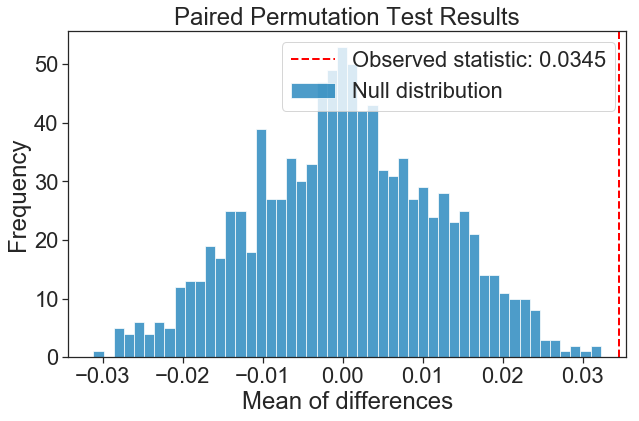

In [17]:
# Convert inputs to numpy arrays
group1 = np.array(boltz_df['beta16'])
group2 = np.array(boltz_df['beta16_plus_hpsc_lj_changes']) 

# Check that the groups have the same length
if len(group1) != len(group2):
    raise ValueError("Both groups must have the same length for paired analysis")

# Calculate the observed test statistic (mean of differences)
differences = group2 - group1
observed_statistic = np.mean(differences)

# Initialize array to store permutation results
n_permutations = 1000
null_distribution = np.zeros(n_permutations)

# Perform permutations
for i in range(n_permutations):
    # Generate random signs (1 or -1) for each pair
    signs = np.random.choice([-1, 1], size=len(differences))
    
    # Apply the random signs to the differences
    permuted_differences = differences * signs
    
    # Compute and store the test statistic
    null_distribution[i] = np.mean(permuted_differences)

# Calculate p-value based on the alternative
p_value = np.mean(null_distribution >= observed_statistic)

print(f"Mean difference (treatment - baseline): {observed_statistic:.4f}")
print(f"Paired permutation test p-value: {p_value:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(null_distribution, bins=50, alpha=0.7, label='Null distribution')
plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2,
            label=f'Observed statistic: {observed_statistic:.4f}')
plt.title('Paired Permutation Test Results')
plt.xlabel('Mean of differences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
boltz_df.sort_values('diff', ascending=False).head(n=10)

,beta16,beta16_plus_hpsc_lj_changes,union,diff
native,,,,
1VFB,0.206835,0.563970,7405,0.357134
2FD6,0.315300,0.646911,1320,0.331611
1PVH,0.173525,0.454466,7158,0.280941
1WEJ,0.010082,0.237905,5818,0.227824
1AK4,0.732928,0.886389,1728,0.153461
1JK9,0.690399,0.829843,8101,0.139444
2OOR,0.058139,0.188859,3697,0.130720
1JPS,0.696931,0.778560,1183,0.081628
1GP2,0.808460,0.883626,3244,0.075167


In [19]:
boltz_df.sort_values('diff', ascending=True).head(n=10)

,beta16,beta16_plus_hpsc_lj_changes,union,diff
native,,,,
4CPA,0.681275,0.550629,6770,-0.130646
1HIA,0.784245,0.697318,8460,-0.086927
2OUL,0.897694,0.857683,7902,-0.040011
1I4D,0.071028,0.044721,6274,-0.026307
1ML0,0.865348,0.847254,4983,-0.018094
1KXP,0.930412,0.918069,2483,-0.012343
2OT3,0.948624,0.941971,4557,-0.006653
1RLB,0.005521,0.000530,4506,-0.004991
1T6B,0.491704,0.487323,3241,-0.004381


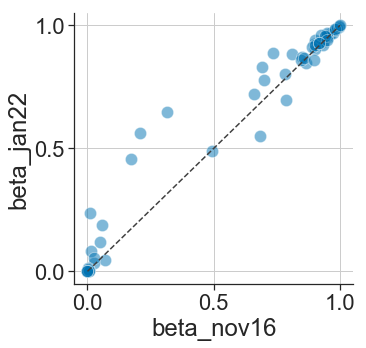

In [23]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='beta16', y='beta16_plus_hpsc_lj_changes', data=boltz_df, s=150, alpha=0.5)
plt.plot([0,1], [0,1], ls='--', c='0.25')
ax = plt.gca()
ax.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
plt.grid()
plt.xlabel('beta_nov16')
plt.ylabel('beta_jan22')
sns.despine()
plt.show()

Decoy-discrimination benchmark for protein interfaces

The benchmark that we use in this paper is an updated version of the one used in Park et al. The original benchmark focused on crystal structures of protein-protein interfaces, where each structure consists of two protein chains that form an interface made up of non-covalent interactions. For each structure, Park et al. computationally generated 1,000 decoys where the two chains were rigidly docked against each other in non-native orientations. Park et al. assessed Rosetta's performance on this benchmark by allowing Rosetta to relax sidechain atoms, using Rosetta to quantify the ddG of binding for each relaxed decoy, and then quantifying whether Rosetta predicts that the binding energies of near-native decoys are more favorable than non-native ones.

We updated this benchmark in the following ways. For each structure, for each of the 1,000 rigidly docked decoys, we jittered one chain relative to the other to create a cloud of closely related structures. From each cloud, we chose the five decoys with the most favorable Rosetta energies, when evaluated using a "soft" energy function that downweights the repulsive term of the Lennard-Jones potential, resulting in 5,000 decoys per native.

Next, we relaxed each decoy using Rosetta. First, we performed an all-atom relax of all residues in a given decoy using the beta_nov16 energy function. Second, we performed an additional all-atom relax of all interface residues in a given decoy, defined as residues within 12 Angstroms of atoms from the opposite chain. For each decoy, we independently performed the second relax step with three different inputs: both chains in the complex (chains A and B), just chain A, or just chain B. We then used the Rosetta energies of the relaxed complex and chains to compute the ddG of binding for a given decoy, where ddG = E_complex - (E_chainA + E_chainB). We perfomed the second relax step with either beta_nov16 or beta_jan22. For a given crystal structure, we evaluated the ability of each energy function to predict whether the binding energies of near-native decoys are more favorable than non-native ones.

In using this benchmark to reparameterize beta_nov16, we used decoys from a set of 65 crystal structures. To validate whether reparameterization resulted in improved performance, we compared the performance of beta_nov16 and beta_jan22 using decoys from a set of 62 crystal structures that were withheld from training.

Carrying out the above relax protocol required a large amount of compute time. To help make this task feasible, we carried out individual relax jobs using Rosetta@home, which is a distributed computing platform that uses computers of volunteers from the public to carry out Rosetta jobs. While useful, using Rosetta@home resulted in some amount of dropout, as some fraction of relax jobs fail. Each relax job generated zero to several replicate outputs for a given input depending on stochasticity in compute environments on the platform. For downstream quality control, we only analyzed decoys with at least two output replicates from the second relax step from above, aggregating replicate scores by taking the minimum. For the 62 crystal structures used in validation, we obtained ddG estimates for both beta_nov16 and beta_jan22 for a median of 5,629 decoys and an interquartile range of 3,642-7,204 decoys (TODO update these numbers, which may result in a very slight change). This number was <1,000 for 3 of the 62 crystal structures, which we excluded from our analysis due to high dropout (the number of output decoys was less than the number of rigid docks from Park et al.). As a quality-control measure, we filtered out a small number of decoys for which we detected signs that the relax protocol was unstable. One sign of instability was that replicates of the second relax step resulted in energies that were very different from each other. We filtered out decoys where the minimum and median energies among replicates differed by more than 0.1 energy units per residue. Another sign of instability was that energies for individual chains (E_chainA or E_chainB) for a given decoy would be much higher than than the median energy of that chain among all decoys for a given crystal structure. We filtered out decoys where this difference was more than 0.1 energy units per residue. For >90% of the validation crystal structures, <5% of decoys were filtered out by the first filter, and <5% by the second filter. Finally, we only analyzed decoys that passed these filters for both energy functions. For one crystal structure, we discarded >15% of decoys, so we chose to exclude this structure from our analysis. (I need to double check a few of these numbers, but they should be very close.)


beta16
0.01 0.34 0.12 0.39
0.025 0.18 0.12 0.27
0.05 0.09 0.09 0.15
0.1 0.01 0.09 0.09
0.15 0.01 0.07 0.07
beta16_plus_hpsc_lj_changes
0.01 0.36 0.12 0.4
0.025 0.18 0.12 0.24
0.05 0.07 0.09 0.15
0.1 0.01 0.09 0.09
0.15 0.01 0.07 0.07

For the second relax, used nstruct 2


all natives: 176
training natives: 65
all validation natives: 111
new validation natives: 76

Methods:
* Try to describe everything concisely
* Start with 1,000
* Jitter, relaxed with beta16, then we relaxed with either beta16 or new one
* How many things of the initial 1,000 did we get, or how many structures did that ultimately generate? e.g., between 4,000-10,000 examples
* Throw out things that only have less than 1,000 outputs from intersection
* A lot of things didn't run because we did this on a parallel system
* Check if length correlates with success

* Apply filter to remove decoys where relax was unstable: total percentage of things that these filters throw out.
* Throw out again anything that has less than 1,000 outputs (or see if things are changing a lot)
* One case suffered significantly, so we threw it out; remaining cases have combined X% failure


* Hahnbeom had 1,000 rigid docks per native
* I jittered each, and picked the top 5 per dock from soft-max score function
* I got data for some number of replicates per dock
* End result is we have ~5,000 docks per native
* See some amount of attrition.

* Input ~5,000 docks: complex, chain A, chain B
* Relax all of them with nstruct = 2

* Filter 1: for each dock (either complex, chain A, or chain B) get all output replicates and make sure the min and median are similar

* Filter 2: for each native, we combine data from the complex, chain A, and chain B and we make sure we have data for all three, and data for at least two replicates.

* Throw out things where at least 50% of things ran

Assess how many decoys passed the filters

In [29]:
filter_name = 'min_median_filter'
data = filter_df[filter_df['filter'] == filter_name].sort_values('frac_passing', ascending=False)
print('cutoff', 'frac_passing')
for i in [0.70, 0.80, 0.90, 0.95]:
    print(i, '\t', sum(data['frac_passing'] >= i) / len(data))
display(data.head())
display(data.tail())

cutoff frac_passing
0.7 	 1.0
0.8 	 1.0
0.9 	 0.9850746268656716
0.95 	 0.8582089552238806


,native,e_function,filter,n_before,n_after,frac_passing
87,1HE8,beta16_plus_hpsc_lj_changes,min_median_filter,478,478,1.000000
318,2FD6,beta16,min_median_filter,3965,3963,0.999496
321,2FD6,beta16_plus_hpsc_lj_changes,min_median_filter,3946,3944,0.999493
126,1JPS,beta16,min_median_filter,3541,3539,0.999435
345,2J7P,beta16_plus_hpsc_lj_changes,min_median_filter,16558,16546,0.999275


,native,e_function,filter,n_before,n_after,frac_passing
171,1ML0,beta16_plus_hpsc_lj_changes,min_median_filter,15145,14167,0.935424
63,1GL1,beta16_plus_hpsc_lj_changes,min_median_filter,6282,5843,0.930118
60,1GL1,beta16,min_median_filter,6411,5899,0.920137
150,1KTZ,beta16,min_median_filter,28634,24374,0.851226
153,1KTZ,beta16_plus_hpsc_lj_changes,min_median_filter,28639,24081,0.840846


In [30]:
filter_name = 'high_chain_scores'
data = filter_df[filter_df['filter'] == filter_name].sort_values('frac_passing', ascending=False)
print('cutoff', 'frac_passing')
for i in [0.70, 0.80, 0.90, 0.95]:
    print(i, '\t', sum(data['frac_passing'] >= i) / len(data))
display(data.head())
display(data.tail())

cutoff frac_passing
0.7 	 1.0
0.8 	 1.0
0.9 	 0.9701492537313433
0.95 	 0.9253731343283582


,native,e_function,filter,n_before,n_after,frac_passing
161,1KXP,beta16_plus_hpsc_lj_changes,high_chain_scores,2223,2223,1.0
179,1MLC,beta16_plus_hpsc_lj_changes,high_chain_scores,5315,5315,1.0
212,1PVH,beta16,high_chain_scores,6939,6939,1.0
350,2OOR,beta16,high_chain_scores,3568,3568,1.0
353,2OOR,beta16_plus_hpsc_lj_changes,high_chain_scores,3071,3071,1.0


,native,e_function,filter,n_before,n_after,frac_passing
200,1OFU,beta16,high_chain_scores,5344,4831,0.904004
113,1I9R,beta16_plus_hpsc_lj_changes,high_chain_scores,3956,3535,0.893579
110,1I9R,beta16,high_chain_scores,3842,3382,0.880271
35,1E96,beta16_plus_hpsc_lj_changes,high_chain_scores,6036,5279,0.874586
32,1E96,beta16,high_chain_scores,5005,4326,0.864336


In [31]:
filter_name = 'complex_and_chains'
data = filter_df[filter_df['filter'] == filter_name].sort_values('frac_passing', ascending=False)
print('cutoff', 'frac_passing')
for i in [0.70, 0.80, 0.90]:
    print(i, '\t', sum(data['frac_passing'] >= i) / len(data))
display(data.head())
display(data.tail())

cutoff frac_passing
0.7 	 0.917910447761194
0.8 	 0.7910447761194029
0.9 	 0.5149253731343284


,native,e_function,filter,n_before,n_after,frac_passing
79,1H9D,beta16,complex_and_chains,10685,10658,0.997473
7,1AK4,beta16,complex_and_chains,1729,1722,0.995951
10,1AK4,beta16_plus_hpsc_lj_changes,complex_and_chains,1729,1720,0.994795
82,1H9D,beta16_plus_hpsc_lj_changes,complex_and_chains,10685,10592,0.991296
85,1HE8,beta16,complex_and_chains,175,173,0.988571


,native,e_function,filter,n_before,n_after,frac_passing
376,2VDB,beta16_plus_hpsc_lj_changes,complex_and_chains,4111,2472,0.601314
88,1HE8,beta16_plus_hpsc_lj_changes,complex_and_chains,175,97,0.554286
385,3BP8,beta16,complex_and_chains,3756,1833,0.488019
391,4CPA,beta16,complex_and_chains,5792,2792,0.482044
397,BOYV,beta16,complex_and_chains,1348,213,0.158012


In [32]:
print('cutoff', 'int_over_union', 'frac_output')
for i in [0.5, 0.6, 0.70, 0.80, 0.90]:
    print(
        i, '\t',
        sum(native_int_df['int_over_union'] >= i) / len(native_int_df), '\t',
        sum(native_int_df['frac_output'] >= i) / len(native_int_df), '\t'
    )
native_int_df.sort_values('int_over_union', ascending=False)

cutoff int_over_union frac_output
0.5 	 0.9384615384615385 	 0.9384615384615385 	
0.6 	 0.8769230769230769 	 0.8153846153846154 	
0.7 	 0.7692307692307693 	 0.7076923076923077 	
0.8 	 0.6153846153846154 	 0.49230769230769234 	
0.9 	 0.3230769230769231 	 0.24615384615384617 	


,native,beta16,beta16_plus_hpsc_lj_changes,union,intersection,int_over_union,est_n_inputs,frac_output
12,1H9D,10647,10579,10654,10572,0.992303,10676,0.990259
1,1AK4,1719,1718,1727,1710,0.990156,1729,0.989011
16,1I4D,6159,6189,6265,6083,0.970950,6246,0.973903
23,1KTZ,6356,6421,6505,6272,0.964181,9461,0.662932
19,1JPS,1142,1169,1182,1129,0.955161,1183,0.954353
33,1PVH,6939,6973,7140,6772,0.948459,7155,0.946471
53,2HLE,1255,1231,1278,1208,0.945227,1285,0.940078
40,1SBB,2433,2515,2550,2398,0.940392,2895,0.828325
21,1KAC,8773,8798,9097,8474,0.931516,9147,0.926424
51,2FD6,1305,1242,1320,1227,0.929545,1323,0.927438


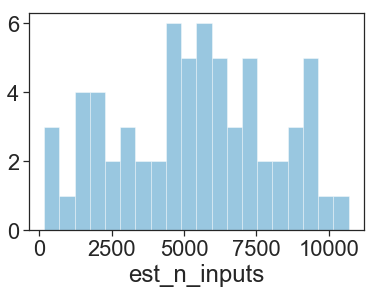

In [35]:
sns.distplot(native_int_df['est_n_inputs'], kde=False, bins=20)

**Strategy to curate data for docking decoy-discrimination benchmark**

* for each input pose, we submitted a relax job with `nstruct` = 2. The jobs often produced more replicates.

* for each landscape, filter out poses where:
    * "FAILURE" is in the `description` column of the output pose
    * for a given input pose, there are fewer than two replicates (ensures we have replicates to help filter)
    * for a given input pose, the median score per res among all output relax replicates is > 0.05 higher than the min (expect relax to be consistent across replicates; filters out poses where the minimum is very different from the median; helped remove apparent outliers)
    
* for each input pose, it's post-relax score is defined to be the minimum score among all output replicates
* next, for each input pose, discard the pose if either of the single-chain relaxes resulted in a score per res that is >= 0.1 units larger than the median (relax may have failed; this can lead to very negative ddGs; helped remove apparent outliers)
* we ignored natives if less than 90% of poses passed the above filter (for nearly all natives, close to 100% of poses passed this filter)

* we only analyzed the intersection of poses that with scores for both energy functions

* we traced the lower edge of each landscape, sampling up to 150 poses total per native. We sample by dividing the landscape into 2A bins, cycling over the bins one at a time, and choosing the lowest-energy pose from each bin (without replacement). We repeat this cycling until we have 150 poses.

* ultimately, have data for a total of 65 natives

Compute Boltzman-weighted discrimination scores for the above landscapes

In [47]:
# Write a file that lists all score files
e_functions = [
    'beta16', 
    'beta16_plus_hpsc_lj_changes'
]
metric = 'ddg'
quantile_cutoff = 0.9
for e_function in e_functions:
    print(e_function)
    scores_files_dir = os.path.join(
        '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
        f'boinc_rerun_lower_edge/{e_function}/'
    )
    scores_files = glob.glob(os.path.join(scores_files_dir, '*.sc'))
    temp_f = os.path.join(scores_files_dir, 'docking_result.temp')
    out_f = os.path.join(scores_files_dir, 'docking_result.sc')
    with open(temp_f, 'w') as f:
        for score_file in scores_files:
            f.write(f'{score_file}\n')
    cmd = ' '.join([
        'scripts/calc1dboltzmann.pl',
        '0.1',
        metric,
        temp_f,
        f'> {out_f}'
    ])
    ! {cmd}

beta16
beta16_plus_hpsc_lj_changes


Compare docking scores

In [48]:
dfs = []
for e_function in e_functions:
    f = os.path.join(
        '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
        f'boinc_rerun_lower_edge/{e_function}/docking_result.sc'
    )
    df = pandas.read_csv(f, skiprows=2, names=['file', 'score'], sep=' ')
    df['e_function'] = e_function
    df['native'] = df['file'].apply(lambda x: x.split('/')[-1].replace('.sc', ''))
    dfs.append(df)

df = (
    pandas.concat(dfs)
    .pivot_table(index='native', columns='e_function', values='score')
    .reset_index()
    .set_index('native')
)
df['diff'] = df['beta16_plus_hpsc_lj_changes'] - df['beta16']
print(len(df))

66


In [49]:
df.sort_values('diff', ascending=False).head(n=10)

e_function,beta16,beta16_plus_hpsc_lj_changes,diff
native,,,
1PVH,0.174607,0.460660,0.286053
1VFB,0.309246,0.564421,0.255175
1WEJ,0.044049,0.237905,0.193856
2FD6,0.458526,0.646911,0.188385
1AK4,0.733547,0.886389,0.152841
1JK9,0.690448,0.831455,0.141007
1K4C,0.027660,0.126850,0.099190
1I4D,0.093098,0.179881,0.086783
1JPS,0.696931,0.778560,0.081628


In [50]:
df.sort_values('diff', ascending=True).head(n=10)

e_function,beta16,beta16_plus_hpsc_lj_changes,diff
native,,,
4CPA,0.679285,0.550823,-0.128463
1HIA,0.782565,0.692940,-0.089624
1BVN,0.980235,0.953146,-0.027089
2FJU,0.954704,0.934584,-0.020120
1R0R,0.900538,0.890690,-0.009849
1ML0,0.867474,0.859530,-0.007944
2OT3,0.951484,0.943985,-0.007499
1ACB,0.967173,0.964603,-0.002570
1SBB,0.993839,0.992464,-0.001375


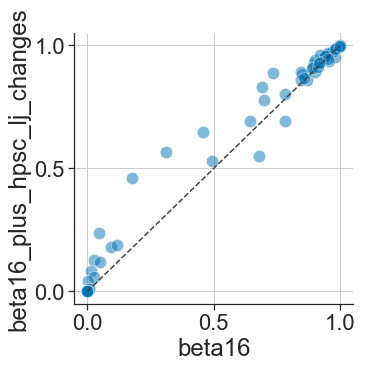

In [51]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='beta16', y='beta16_plus_hpsc_lj_changes', data=df, s=150, alpha=0.5)
plt.plot([0,1], [0,1], ls='--', c='0.25')
ax = plt.gca()
ax.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
plt.grid()
sns.despine()
plt.show()

**Updates:**
* docking benchmark
    * had to do some QC
    * new energy function does a bit better
* monomer ddG
    * had to rework some of the code
    * new energy function is about the same as beta_nov16

**Strategy to curate data for docking decoy-discrimination benchmark**

* for each input pose, we submitted a relax job with `nstruct` = 2. The jobs often produced more replicates.

* for each landscape, filter out poses where:
    * "FAILURE" is in the `description` column of the output pose
    * for a given input pose, there are fewer than two replicates (ensures we have replicates to help filter)
    * for a given input pose, the median score per res among all output relax replicates is > 0.05 higher than the min (expect relax to be consistent across replicates; filters out poses where the minimum is very different from the median; helped remove apparent outliers)
    
* for each input pose, it's post-relax score is defined to be the minimum score among all output replicates
* next, for each input pose, discard the pose if either of the single-chain relaxes resulted in a score per res that is >= 0.1 units larger than the median (relax may have failed; this can lead to very negative ddGs; helped remove apparent outliers)
* we ignored natives if less than 90% of poses passed the above filter (for nearly all natives, close to 100% of poses passed this filter)

* we only analyzed the intersection of poses that with scores for both energy functions

* we traced the lower edge of each landscape, sampling up to 150 poses total per native. We sample by dividing the landscape into 2A bins, cycling over the bins one at a time, and choosing the lowest-energy pose from each bin (without replacement). We repeat this cycling until we have 150 poses.

* ultimately, have data for a total of 65 natives


**List of tests for benchmarking the energy functions:**
* distance-distribution test: new energy function clearly better
* docking test: new energy function a bit better
* interface ddG: about same, new one marginally better
* monomer ddG: about the same, new one marginally worse
* sequence recovery: include this one? (can leave this one out)

**TODO**
* make sure the results are archived
* for each filter, calculate what fraction of things get thrown out
* writing the paper
    * putting the scores into a table
    * writing the methods section describing the benchmarks
    * send Frank an update by Tuesday of next week

**Observations**
* 2VDB
    * big score difference, but mainly due to a single outlier; near-native with very negative score in new energy function.
    * not just single chain with very positive score; not sure how to filter
* 1EER and 1R0R also look suspicious
* 1VFB, 2FD6, 1WEJ, 1AK4: looks like effect might be real

In [154]:
cmd

'scripts/calc1dboltzmann.pl 0.1 ddg /net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/boinc_rerun_lower_edge_0.9/beta16/docking_result.temp > /net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/boinc_rerun_lower_edge_0.9/beta16/docking_result.sc'

In [157]:
os.getcwd()

'/mnt/home/haddox/2021/ppi_benchmark'

In [134]:
all_chains_df[all_chains_df['name'].str.contains('HKH_2021_1E96_run_2_complex.12_chain_B_5_00001')]

,name,score,rms,nreps,ref,chain,native,e_function
8,HKH_2021_1E96_run_2_complex.12_chain_B_5_00001...,-1162.161,22.022,4,-78.541,x,1E96,beta16_plus_hpsc_lj_changes
8,HKH_2021_1E96_run_2_complex.12_chain_B_5_00001...,-530.739,0.886,20,-52.946,A,1E96,beta16_plus_hpsc_lj_changes
8,HKH_2021_1E96_run_2_complex.12_chain_B_5_00001...,-505.109,16.162,31,-25.595,B,1E96,beta16_plus_hpsc_lj_changes


In [146]:
e_function = 'beta16' # 'beta16_plus_hpsc_lj_changes'
data = ddg_df[ddg_df['e_function'] == e_function]
print(len(data))
data['B'].quantile(0.01), data['B'].quantile(0.5), data['B'].quantile(0.9)

(-620.12736, -608.143, -579.577)

In [144]:
e_function = 'beta16' # 'beta16_plus_hpsc_lj_changes'
native = '1E96'
f = os.path.join(
    '/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/',
    f'boinc_rerun_lower_edge/{e_function}/{native}.sc'
)
df = pandas.read_csv(f)
df.sort_values('ddg').head()

,name,e_function,A,B,x,native,rms,ref,ddg,description
0,HKH_2021_1E96_run_2_complex.822_chain_B_7_0000...,beta16,-568.536,-561.651,-1190.827,1.000000e+96,14.906,-78.541,-60.640,HKH_2021_1E96_run_2_complex.822_chain_B_7_0000...
1,HKH_2021_1E96_run_1_complex.874_chain_B_2_0000...,beta16,-561.058,-555.373,-1164.509,1.000000e+96,17.787,-78.541,-48.078,HKH_2021_1E96_run_1_complex.874_chain_B_2_0000...
2,HKH_2021_1E96_run_1_1E96_bound_native_chain_B_...,beta16,-601.721,-610.591,-1246.529,1.000000e+96,0.483,-78.541,-34.217,HKH_2021_1E96_run_1_1E96_bound_native_chain_B_...
3,HKH_2021_1E96_bound_native_4_xtal_0000100001_0...,beta16,-597.552,-615.179,-1245.600,1.000000e+96,0.469,-78.541,-32.869,HKH_2021_1E96_bound_native_4_xtal_0000100001_0...
4,HKH_2021_1E96_1E96_bound_native_0000300003_000...,beta16,-602.374,-613.641,-1248.766,1.000000e+96,0.477,-78.541,-32.751,HKH_2021_1E96_1E96_bound_native_0000300003_000...
5,HKH_2021_1E96_bound_native_9_xtal_0000100001_0...,beta16,-597.084,-611.730,-1241.402,1.000000e+96,0.485,-78.541,-32.588,HKH_2021_1E96_bound_native_9_xtal_0000100001_0...
6,HKH_2021_1E96_run_1_1E96_bound_native_chain_B_...,beta16,-600.670,-614.806,-1247.911,1.000000e+96,0.487,-78.541,-32.435,HKH_2021_1E96_run_1_1E96_bound_native_chain_B_...
7,HKH_2021_1E96_bound_native_1_xtal_0000100001_0...,beta16,-598.408,-610.968,-1241.648,1.000000e+96,0.474,-78.541,-32.272,HKH_2021_1E96_bound_native_1_xtal_0000100001_0...
8,HKH_2021_1E96_1E96_bound_native_0000100001_000...,beta16,-598.586,-615.480,-1246.139,1.000000e+96,0.479,-78.541,-32.073,HKH_2021_1E96_1E96_bound_native_0000100001_000...
9,HKH_2021_1E96_bound_native_7_xtal_0000100001_0...,beta16,-600.330,-615.427,-1247.174,1.000000e+96,0.481,-78.541,-31.417,HKH_2021_1E96_bound_native_7_xtal_0000100001_0...


In [ ]:
# Raise value error if 'FAILURE' appears in description column

# For each energy function, compute the Boltzman score for each landscape


Past numbers:

e_function                   native
beta16                       1ACB        638
                             1KAC      12748
beta16_plus_hpsc_lj_changes  1ACB        613
                             1AK4       1729
                             1KAC      10215

beta16


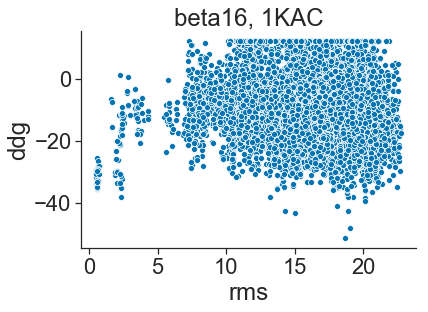

beta16_plus_hpsc_lj_changes


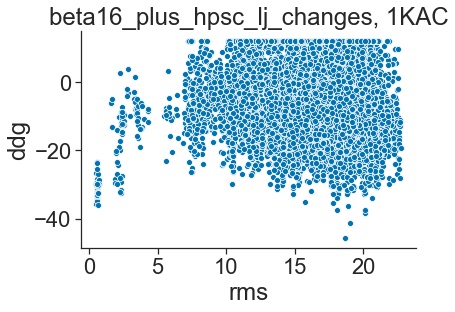

In [96]:
native = '1KAC'
for (e_function, data) in dd_score_df.groupby('e_function'):
    data = data[(data['native'] == native)]
    print(e_function)
    sns.scatterplot(x='rms', y='ddg', data=data)
    plt.title(f'{e_function}, {native}')
    sns.despine()
    plt.show()

In [ ]:
data.sort_values('ddg')['name'].iloc[0]

'HKH_2021_1KAC_run_1_complex.115_chain_B_10_0000100001_0000001_0'

In [100]:
dd_score_df[dd_score_df['name'] == 'HKH_2021_1KAC_run_1_complex.115_chain_B_10_0000100001_0000001_0']

,name,e_function,A,B,x,native,rms,ref,ddg
353,HKH_2021_1KAC_run_1_complex.115_chain_B_10_000...,beta16,-666.590,-419.442,-1137.444,1KAC,18.620,-149.819,-51.412
354,HKH_2021_1KAC_run_1_complex.115_chain_B_10_000...,beta16_plus_hpsc_lj_changes,-652.765,-411.372,-1109.964,1KAC,18.628,-149.819,-45.827


In [97]:
data.sort_values('ddg')

,name,e_function,A,B,x,native,rms,ref,ddg
354,HKH_2021_1KAC_run_1_complex.115_chain_B_10_000...,beta16_plus_hpsc_lj_changes,-652.765,-411.372,-1109.964,1KAC,18.628,-149.819,-45.8270
1695,HKH_2021_1KAC_run_1_complex.186_chain_B_4_0000...,beta16_plus_hpsc_lj_changes,-647.088,-413.286,-1101.680,1KAC,19.014,-149.819,-41.3060
446,HKH_2021_1KAC_run_1_complex.11_chain_B_3_00001...,beta16_plus_hpsc_lj_changes,-641.931,-415.159,-1095.349,1KAC,20.092,-149.819,-38.2590
10971,HKH_2021_1KAC_run_2_complex.225_chain_B_4_0000...,beta16_plus_hpsc_lj_changes,-645.474,-408.756,-1091.859,1KAC,20.118,-149.819,-37.6290
82,HKH_2021_1KAC_run_1_complex.102_chain_B_11_000...,beta16_plus_hpsc_lj_changes,-648.248,-423.890,-1109.702,1KAC,18.097,-149.819,-37.5640
1693,HKH_2021_1KAC_run_1_complex.186_chain_B_1_0000...,beta16_plus_hpsc_lj_changes,-647.274,-418.203,-1101.767,1KAC,18.847,-149.819,-36.2900
2027,HKH_2021_1KAC_run_1_complex.20_chain_B_20_0000...,beta16_plus_hpsc_lj_changes,-662.572,-409.681,-1108.387,1KAC,0.618,-149.819,-36.1340
3,HKH_2021_1KAC_bound_native_1_xtal_0000100001_0...,beta16_plus_hpsc_lj_changes,-649.655,-420.131,-1105.506,1KAC,0.523,-149.819,-35.7200
11472,HKH_2021_1KAC_run_2_complex.282_chain_B_11_000...,beta16_plus_hpsc_lj_changes,-646.043,-401.123,-1082.462,1KAC,17.783,-149.819,-35.2960
16440,HKH_2021_1KAC_run_2_complex.784_chain_B_15_000...,beta16_plus_hpsc_lj_changes,-645.967,-414.201,-1095.394,1KAC,15.752,-149.819,-35.2260


Having selected decoys from above, compute ddG of each decoy by doing a full relax of the complex and each individual chain. The relax protocols add PDB-info labels that indicate which residues are non-interface residues, so that future protocols can use this info (which would not be apparent for individual chains). I will renumber saved PDBs so that the numbers match the PDB-info labels.

In [14]:
# Define input params
n_total_samples = 12000
e_function = 'beta16_plus_hpsc_lj_changes' # 'beta_nov16' # 'HH_run23A_step384' # 
(weights, flags, extra_args) = e_functions_dict[e_function]
dont_include_S = True
resultsdir = '/net/scratch/haddox/2021/ppi_benchmark/results'
if dont_include_S:
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples}_noS/'
    )
else:
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples}/'
    )
relaxscript = 'MonomerDesign2019'

# Make list of XMLs to test
xml_dict = {
    'relax_interface_of_complex' : \
        'scripts/relax_interface_of_complex.xml',
    'relax_interface_of_chainA' : \
        'scripts/relax_interface_of_chainA.xml',
    'relax_interface_of_chainB' : \
        'scripts/relax_interface_of_chainB.xml',
}

# Cycle through natives and score silent files from each
for (i, native) in enumerate(new_validation_natives): # natives_to_score:

    if i > 10:
        continue
    
    # Get the path to the native xtal
    native_xtal = f'data/natives/{native}_bound_native.pdb'
    
    # Make a list of silent files
    split_silent_files = glob.glob(os.path.join(
        top_pdbs_results_dir,
        f'{native}_split_silent_files/',
        '*'
    ))
    if len(split_silent_files) == 0:
        # print(native, "no silent files")
        continue

    # Define output directory for energy function
    if e_function == 'beta_nov16':
        output_dir = top_pdbs_results_dir
    else:
        output_dir = os.path.join(
            top_pdbs_results_dir,
            e_function + '/'
        )
        if not os.path.isdir(output_dir):
            os.makedirs(output_dir)
    
    # Relax each file with each protocol
    cmds = []
    for input_silent_file in split_silent_files:
        silent_id = os.path.basename(input_silent_file)
        for xml_name in xml_dict:

            # Assemble command
            xml = xml_dict[xml_name]
            output_prefix = os.path.join(
                output_dir,
                f'{native}_{silent_id}_{xml_name}'
            )
            scores_file = f'{output_prefix}.sc'
            if os.path.isfile(scores_file):
                continue
            cmd = ' '.join([
                '~/Rosetta/main/source/bin/rosetta_scripts.default.linuxgccrelease',
                f'-parser:protocol {xml}',
                '-parser:script_vars',
                f'wts={weights}',
                f'relaxscript={relaxscript}',
                f'-in:file:silent {input_silent_file}',
                '-in:file:silent_struct_type binary',
                f'-score:weights {weights}',
                '-crystal_refine true',
                f'-in:file:native {native_xtal}',
                f'-out:prefix {output_dir}',
                '-out:file:renumber_pdb true',
                f'-out:file:scorefile {output_prefix}.sc',
                f'-out:file:silent {output_prefix}.out',
                '-silent_read_through_errors',
                '-mute all'
            ])
            for extra_arg in extra_args:
                cmd += f' {extra_arg}'
            if flags:
                cmd += f' @{flags}'
            cmds.append(cmd)
    
    if (len(cmds) == 0) or (len(cmds) > 1000):
        continue
        
    # Sumbit commands from above
    sbatch_file_name = os.path.join(
        output_dir,
        f'{native}_commands.sbatch'
    )
    command_file_name = sbatch_file_name.replace('.sbatch', '.txt')
    if not os.path.isfile(command_file_name):
        print(native, i, len(cmds))
        with open(command_file_name, 'w') as f:
            for cmd in cmds:
                f.write(f'{cmd}\n')
        design_utils.WriteSbatchFile(
            sbatch_file_name,
            command_file_name=command_file_name,
            queue_type='cpu-bf',
            memory='3g',
            write_out_err=True,
        )
        ! sbatch -a 1-$(cat {command_file_name}|wc -l) {sbatch_file_name}
        raise ValueError(sbatch_file_name)
            
#             # Submit job
#             sbatch_file_name = f'{output_prefix}.sbatch'
#             if not os.path.isfile(sbatch_file_name):
#                 design_utils.WriteSbatchFile(
#                     sbatch_file_name,
#                     command=cmd,
#                     queue_type='medium',
#                     memory='3g'
#                 )
#                 ! sbatch {sbatch_file_name}

1E96 9 918
Submitted batch job 52376500


ValueError: /net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/beta16_plus_hpsc_lj_changes/1E96_commands.sbatch

67 natives
~5,000 structures per native
50 structures per silent file
100 silent files
3 relax jobs per silent file
300 relax jobs per native
20,000 relax jobs total

1,000 relax jobs per day
20 days

100 relax jobs per day
200 days

In [21]:
300 * 67

20100

In [32]:
sbatch_file_name

'/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top12000_noS/beta16_plus_hpsc_lj_changes/1EER_commands.sbatch'

For each native, read in scores from above and compute ddG, then select the top ~150 decoys for that native, spread roughly evenly across bins, and write the decoys to a silent file.

In [ ]:
make_plots = False
make_out_files = True
e_function = 'HH_run23A_step384' # 'beta_nov16' # 
n_total_samples_optE_dir = 12000
f_ids = ['complex', 'chainA', 'chainB']
relaxscript_name = 'MonomerDesign2019'

if e_function == 'beta_nov16':
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples_optE_dir}_noS/'
    )
    optE_results_dir = f'results/silent_files_for_optE_ddg_top{n_total_samples_optE_dir}_noS/'
else:
    top_pdbs_results_dir = os.path.join(
        resultsdir,
        f'silent_files_binned_top{n_total_samples_optE_dir}_noS/',
        f'{e_function}/'
    )
    optE_results_dir = os.path.join(
        'results',
        f'silent_files_for_optE_ddg_top{n_total_samples_optE_dir}_noS/',
        f'{e_function}_silent_files/'
    )
home_top_pdbs_results_dir = top_pdbs_results_dir.replace(
    '/net/scratch/', '/home/'
)
if not os.path.isdir(top_pdbs_results_dir):
    os.makedirs(top_pdbs_results_dir)
if not os.path.isdir(home_top_pdbs_results_dir):
    os.makedirs(home_top_pdbs_results_dir)
if not os.path.isdir(optE_results_dir):
    os.makedirs(optE_results_dir)

# Cycle through natives one at a time, compute ddgs,
# and select decoys for optE
pdbs_for_optE_dict = {}
all_pdbs_for_optE = []
all_scores_files = {
    'training_natives' : [],
    'old_validation_natives' : [],
    'natives_100' : [],
    'new_validation_natives' : [],
}
ddg_dfs = []
for native in all_natives:
    
    if native in ['1FAK', '1BKD', '1WQ1', '2SNI']:
        continue
    
    # Read in data from different relax jobs
    n_fs = 0
    for f_id in f_ids:
        
        # Make a list of score files
        score_fs = glob.glob(os.path.join(
            top_pdbs_results_dir,
            f'{native}_*_{f_id}.sc'
        ))
        n_fs += len(score_fs)
        if len(score_fs) == 0:
            continue
        
        # Concatenate all silent files into one for
        # downstream purposes
        if make_out_files:
            silent_fs = glob.glob(os.path.join(
                top_pdbs_results_dir,
                f'{native}_*_{f_id}.out'
            ))
            all_out_file = os.path.join(
                top_pdbs_results_dir,
                f'{native}_all_decoys_{f_id}.out'
            )
            if not os.path.isfile(all_out_file):
                print(f"{native}: concatenating {len(silent_fs)} silent files for {f_id}")
                cat_cmd = ' '.join(
                    ['cat'] + silent_fs + [f'> {all_out_file}']
                )
                subprocess.check_call(
                    cat_cmd, shell=True,
                )
        
        # Read in data
        dfs = []
        for f in score_fs:
            home_f = f.replace('/net/scratch/', '/home/')
            if not os.path.isfile(home_f):
                shutil.copy(f, home_f)
            df = pandas.read_csv(home_f, skiprows=1, sep='\s+')
            dfs.append(df)
        df = pandas.concat(dfs, sort=False)
        if f_id == 'complex':
            ddg_df = df.copy()
        else:
            df[f_id] = df['total_score']
            ddg_df = ddg_df.merge(
                df[[f_id, 'description']],
                on='description', how='inner'
            )
#     if len(ddg_df) < 1000:
#         continue
    if n_fs == 0:
        continue

    # Identify relaxed natives
    ddg_df['decoy_type'] = ddg_df['description'].apply(
        lambda x: 'native' if 'xtal' in x else 'decoy'
    )
    ddg_df.sort_values('decoy_type', inplace=True)
    ddg_df['rms'] = ddg_df['rmsd']
    ddg_df['native'] = native
    ddg_df['pdb'] = ddg_df['description'].apply(os.path.basename)
        
    # Compute ddg from the total score of the relaxed complex
    # compared to the total score of each chain relaxed on its own
    ddg_df['ddg'] = \
        ddg_df['total_score'] - ddg_df['chainA'] - ddg_df['chainB']
    ddg_dfs.append(ddg_df)
    
    # Plot data for all ~1K relaxed structures
    if make_plots:
        print(native, native in natives_100, len(ddg_df), sum(ddg_df['decoy_type'] == 'native'))
        (fig, axs) = plt.subplots(
            ncols=2, figsize=[12,5], sharex=True
        )
        ddg_df.sort_values('decoy_type', inplace=True)
        metrics = ['total_score', 'ddg']
        for (i, metric) in enumerate(metrics):
            sns.scatterplot(
                x='rmsd', y=metric, data=ddg_df, ax=axs[i],
                hue='decoy_type', hue_order=['decoy', 'native']
            )
            axs[i].set(ylabel='', title=metric)
            axs[i].get_legend().remove()
        axs[0].set(ylabel='energy')
        plt.tight_layout()
        sns.despine()
        plt.show()

        plt.figure(figsize=[3,3])
        sns.scatterplot(x='ddg', y='total_score', data=ddg_df)
        sns.despine()
        plt.show()
    
    if not make_out_files:
        continue
    
    # Select top ~150 decoys, spread roughly evenly across bins
    n_total_samples = 150
    max_rmsd = ddg_df['rms'].max()
    bin_size = 2 # Angstroms
    n_samples_per_bin = 50 # just to initially populate bins
    bin_mins = list(np.arange(0, max_rmsd+bin_size, bin_size))
    ddg_df.sort_values('ddg', inplace=True)
    binned_pdbs = {}
    for bin_min in bin_mins:
        data = ddg_df[
            (ddg_df['rms'].between(bin_min, bin_min+bin_size))
        ].copy()
        binned_pdbs[bin_min] = \
            list(data['description'][:n_samples_per_bin])

    # Downselect PDBs to test by cycling through bins and
    # choosing low-energy structures one per cycle.
    pdbs_for_optE = []
    for pdb_index in range(n_samples_per_bin):
        for bin_min in bin_mins:
            if len(binned_pdbs[bin_min]) < pdb_index+1:
                continue
            pdbs_for_optE.append(binned_pdbs[bin_min][pdb_index])
            if len(pdbs_for_optE) >= n_total_samples:
                break
        if len(pdbs_for_optE) >= n_total_samples:
            break
    pdbs_for_optE_dict[native] = pdbs_for_optE
    all_pdbs_for_optE += pdbs_for_optE
    
    # Write file with scores
    data = ddg_df[ddg_df['description'].isin(pdbs_for_optE)]
    score_file = os.path.join(optE_results_dir, f'{native}.sc')
    data.to_csv(score_file, index=False, sep='\t')
    if native in natives_100:
        all_scores_files['natives_100'].append(score_file)
    if native in training_natives:
        all_scores_files['training_natives'].append(score_file)
    elif native in natives_100:
        all_scores_files['old_validation_natives'].append(score_file)
    elif native in new_validation_natives:
        all_scores_files['new_validation_natives'].append(score_file)
    else:
        raise ValueError(score_file)
    
    # Plot data for all ~150 decoys relaxes
    if make_plots:
        print('for optE', len(data), sum(data['decoy_type'] == 'native'))
        (fig, axs) = plt.subplots(
            ncols=2, figsize=[12,5], sharex=True
        )
        metrics = ['total_score', 'ddg']
        for (i, metric) in enumerate(metrics):
            sns.scatterplot(
                x='rmsd', y=metric, data=data, ax=axs[i],
                hue='decoy_type', hue_order=['decoy', 'native']
            )
            axs[i].set(ylabel='', title=metric)
            axs[i].get_legend().remove()
        axs[0].set(ylabel='energy')
        plt.tight_layout()
        sns.despine()
        plt.show()
    
    # Make a single silent file with just the ~150 decoys
    # for optE
    tags_file = os.path.join(
        optE_results_dir,
        f'{native}_tags_for_optE.txt'
    )
    if not os.path.isfile(tags_file):
        with open(tags_file, 'w') as f:
            for pdb in pdbs_for_optE:
                f.write(f'{pdb}\n')
    for f_id in f_ids:
        all_out_file = os.path.join(
            top_pdbs_results_dir,
            f'{native}_all_decoys_{f_id}.out'
        )
        optE_silent_file = os.path.join(
            optE_results_dir,
            f'{native}_{f_id}.out'
        )
        if not os.path.isfile(optE_silent_file):
            cmd = ' '.join([
                f'cat {tags_file} |',
                f'/home/haddox/software/silent_tools/silentslice {all_out_file} >',
                optE_silent_file
            ])
            out = subprocess.check_call(cmd, shell=True)
        
# Make a big dataframe with all ddg values
ddg_df = pandas.concat(ddg_dfs, sort=False)
print(e_function, len(ddg_df))
ddg_df.to_csv(f'results/{e_function}_ddg_df.csv')
ddg_df[ddg_df['description'].isin(all_pdbs_for_optE)].to_csv(f'results/{e_function}_ddg_df_for_optE.csv')

# Write a file that lists all score files
metric = 'ddg'
for group in all_scores_files:
    if not make_out_files:
        continue
    scores_files = all_scores_files[group]
    if len(scores_files) == 0:
        continue
    temp_f = f'results/temp_optE_{relaxscript_name}_{e_function}_{metric}_{group}_top{n_total_samples_optE_dir}.docking'
    out_f = f'results/score_docking_result_optE_input_{e_function}_{metric}_{group}_top{n_total_samples_optE_dir}'
    with open(temp_f, 'w') as f:
        for score_file in scores_files:
            f.write(f'{score_file}\n')
    cmd = ' '.join([
        'scripts/calc1dboltzmann.pl',
        '0.1',
        metric,
        temp_f,
        f'> {out_f}'
    ])
    ! {cmd}

Number of data points
* beta_nov16: 153216, 152901
* HH: 151474, 151163

In [ ]:
beta_scores_df = pandas.read_csv(f'results/beta_nov16_ddg_df_for_optE.csv')
new_scores_df = pandas.read_csv(f'results/HH_run23A_step384_ddg_df_for_optE.csv')
print(len(beta_scores_df), len(new_scores_df))

In [ ]:
beta_pdbs = set(beta_scores_df['pdb'])
new_pdbs = set(new_scores_df['pdb'])
print(len(beta_pdbs), len(new_pdbs))

In [ ]:
# out_files = glob.glob('/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top1000_noS/*.sbatch.out')
# for out_file in out_files:
#     with open(out_file) as f:
#         line = f.readline()
#         if "Got some signal" in line:
#             print(out_file)
#             files_to_remove = glob.glob(out_file.replace('.sbatch.out', '*'))
#             for file in files_to_remove:
#                 os.remove(file)

In [ ]:
diff = sorted(list(beta_pdbs.difference(new_pdbs)))
print(len(diff))
diff[:5]

In [ ]:
beta_scores_df[
    beta_scores_df['pdb'] == 'HKH_2021_1A2K_run_1_1A2K_bound_native_chain_B_19_0000100001_0000001_0_0001'
].iloc[0]['description']

In [ ]:
diff = sorted(list(new_pdbs.difference(beta_pdbs)))
print(len(diff))
diff[:5]

Report discrimination scores for each group of proteins

In [ ]:
groups = [
    'training_natives',
    #'old_validation_natives',
    'natives_100',
    'new_validation_natives',
]
e_functions = [
    'beta_nov16',
    'HH_run23A_step384'
]
n_total_samples_optE_dir = 12000
print(n_total_samples_optE_dir)
for e_function in e_functions:
    print('\n#------------------')
    print(e_function)
    for group in groups:
        out_f = \
            f'results/score_docking_result_optE_input_{e_function}_{metric}_{group}_top{n_total_samples_optE_dir}'
        with open(out_f) as f:
            lines = f.readlines()
            score = round(float(lines[0].strip().split()[0]), 2)
        print(group, len(all_scores_files[group]), score)

* Will the results from below with 150 decoys validate with the larger set?
    * The results validated with the training natives. And none of the withheld decoys were seen during training. So, it stands to reason that the results with the validation natives should remain consistent as well.
        * both the training and validation sets have many structures. So, it is unlikely that a result with one wouldn't generally hold with the other
    * Why would the results not hold?
        * if the validation set is somehow biased
        * if there was an error with the computations

Plot discrimination scores between energy functions

In [ ]:
# Read in data and print scores
ds_dict = {
    key : []
    for key in ['e_function', 'native', 'score']
}
group = 'natives_100' # 'training_natives' # 'new_validation_natives' # 
print(group)
e_functions = [
    'beta_nov16',
    'HH_run23A_step384'
]
n_total_samples_optE_dir = 12000
for e_function in e_functions:
    f = f'results/score_docking_result_optE_input_{e_function}_ddg_{group}_top{n_total_samples_optE_dir}'
    with open(f) as f_open:
        lines = f_open.readlines()
        score = round(float(lines[0].strip().split()[0]), 2)
        print(e_function, score)
        for line in lines:
            elements = line.strip().split()
            if len(elements) != 2:
                continue
            native = os.path.basename(elements[0])[:4]
            score = float(elements[1])
            ds_dict['e_function'].append(e_function)
            ds_dict['native'].append(native)
            ds_dict['score'].append(score)
ds_df = pandas.DataFrame(ds_dict)
ds_df = ds_df.pivot(index='native', columns='e_function', values='score')
ds_df['diff'] = ds_df[e_functions[1]] - ds_df[e_functions[0]]

# Plot data
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(
    [0, 1], [0, 1],
    c='0.25', ls='--'
)
sns.scatterplot(
    x=e_functions[0], y=e_functions[1], data=ds_df,
    s=90, alpha=0.5
)
ax.grid()
ax.set(
    xticks=[0, 0.5, 1], yticks=[0, 0.5, 1],
    #xlabel='current benchmark',
    ylabel='new variant'
)
ax.set_aspect('equal', adjustable='box')
sns.despine()
plt.show()

In [ ]:
ds_df[e_functions+['diff']].sort_values('diff', ascending=True).head(n=10)

Plot landscapes for a single native and the above two energy functions

In [ ]:
natives = ['2AJF', '1E4K', '1SBB', '1I9R', '1H9D',] # '2AJF' # '1ZHH' # 
for native in natives:
    print(native)
    (fig, axs) = plt.subplots(
        ncols=2, figsize=(12,5), sharex=True,
        sharey=True
    )
    upper_ddg = 50
    print(f"Clipping ddg at {upper_ddg}")
    for (i, df) in enumerate([beta_scores_df, new_scores_df]):
        data = df[df['native'] == native].copy()
        data['ddg'] = data['ddg'].clip(upper=upper_ddg)
        data.sort_values('decoy_type', inplace=True)
        sns.scatterplot(
            x='rmsd', y='ddg', data=data, ax=axs[i],
            hue='decoy_type', hue_order=['decoy', 'native'],
            s=90, alpha=0.5
        )
        axs[i].get_legend().remove()
    axs[0].set(
        title='beta_nov16', ylabel='$\Delta G_{binding}$',
        xlabel='RMSD'
    )
    axs[1].set(
        title='new', ylabel='', xlabel='RMSD'
    )
    plt.tight_layout()
    sns.despine()
    plt.show()

**Observations**
* landscapes that get worse
    * 1SBB: small interface, only 3 H-bonds across interface despite many polars
    * 1I9R: big interface, only 6 H-bonds across interface despite many polars
    * 1H9D: medium interface, some H-bonds, but many loosely packed polars near cavities, such as edge strand and Ser/Thrs
    
* to do
    * maybe try changing from poly leu to poly val

In [ ]:
# Get data for native
native = '1H9D' # '1SBB' # '2OOR' # '1E6J' #'1GXD', '1QFW', 'BOYV', , # '1KLU'
e_function = 'HH_run23A_step384' # 'beta_nov16' # 
n_total_samples_optE_dir = 12000
if e_function == 'beta_nov16':
    optE_results_dir = f'results/silent_files_for_optE_ddg_top{n_total_samples_optE_dir}_noS/'
    data = beta_scores_df.copy()
else:
    optE_results_dir = os.path.join(
        'results',
        f'silent_files_for_optE_ddg_top{n_total_samples_optE_dir}_noS/',
        f'{e_function}_silent_files/'
    )
    data = new_scores_df.copy()
data = data[
    #(ddg_df['rms'].between(0,1)) &
    (data['native'] == native)
]
data.sort_values('ddg', inplace=True)
display(data[['ddg', 'total_score', 'rms', 'pdb']].head())

# Copy native to eye-test dir
eyetest_dir = f'results/eye_test/{e_function}/{native}'
if not os.path.isdir(eyetest_dir):
    os.makedirs(eyetest_dir)
native_xtal = f'data/natives/{native}_bound_native.pdb'
shutil.copy(native_xtal, eyetest_dir)

# Copy decoys to eye-test dir
working_dir = optE_results_dir
for f_id in ['complex']: # , 'chainA', 'chainB']: # 
    silent_file = f'{native}_{f_id}.out'
    tags = list(data['description'].iloc[:2])
    design_utils.extract_pdbs_from_silent_file(
        working_dir,
        silent_file,
        extra_args=[
            '-in:file:silent_struct_type binary',
            f'-suffix _{f_id}'
        ],
        tags=tags,
        output_dir=False
    )
    time.sleep(5)
    for tag in tags:      
        #shutil.copy(f'{tag}_{f_id}.pdb', optE_results_dir)
        tag_bn = os.path.basename(tag)
        shutil.copy(
           f'{tag}.pdb',
           os.path.join(eyetest_dir, f'{tag_bn}_{f_id}.pdb')
        )

In [ ]:
tags

Plot differences in "energy gaps" between energy functions

In [ ]:
gaps_dict = {
    key : []
    for key in ['e_function', 'native', 'gap']
}
e_functions = [
    'beta_nov16',
    'HH_run23A_step384'
]
for e_function in e_functions:
    
    # Get data for energy function
    ddg_df = pandas.read_csv(f'results/{e_function}_ddg_df.csv')
    ddg_df.sort_values('ddg', ascending=True, inplace=True)
    
    # Record gaps for each native
    for native in new_validation_natives:
        mean_best_native = round(ddg_df[
            (ddg_df['native'] == native) &
            (ddg_df['rmsd'] < 1.5)
        ]['ddg'][:5].mean(), 2)
        mean_best_decoy = round(ddg_df[
            (ddg_df['native'] == native) &
            (ddg_df['rmsd'] > 6)
        ]['ddg'][:5].mean(), 2)
        gap = mean_best_native - mean_best_decoy
        gaps_dict['e_function'].append(e_function)
        gaps_dict['native'].append(native)
        gaps_dict['gap'].append(gap)

gaps_df = pandas.DataFrame(gaps_dict)
gaps_df = gaps_df.pivot(index='native', columns='e_function', values='gap')
print(len(gaps_df))

In [ ]:
gaps_df.sort_values('HH_run23A_step384', ascending=False).head()

In [ ]:
# Plot data
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(
    [-50, 50], [-50, 50],
    c='0.25', ls='--'
)
sns.scatterplot(
    x=e_functions[0], y=e_functions[1], data=gaps_df,
    s=70, alpha=0.5
)
ax.grid()
ax.set(
    xlim=[-55, 55], ylim=[-55,55],
    xticks=[-50, 0, 50], yticks=[-50, 0, 50],
    #xlabel='current benchmark', ylabel='new benchmark'
)
ax.set_aspect('equal', adjustable='box')
sns.despine()
plt.show()

Plot total score compared to ddg

In [ ]:
spread_dict = {
    key : []
    for key in [
        'native', 'total_score_all', 'ddg_all',
        'total_score_native', 'ddg_native'
    ]
}
natives_to_score = sorted(natives_to_score)
natives_to_plot = [
    '1OYV',
    '1H9D', #'1E4K', '1GHQ', '1HE8', '1KLU',
]
e_function = 'HH_run23A_step384' # 'beta_nov16' # 
print(e_function)
ddg_df = pandas.read_csv(f'results/{e_function}_ddg_df.csv')
for native in natives_to_plot: # natives_to_score:
    print(native)
    (fig, axs) = plt.subplots(
        ncols=2, figsize=(12,5), sharex=True
    )
    ddg_df.sort_values('decoy_type', inplace=True)
    data = ddg_df[ddg_df['native'] == native].copy()
    if len(data) == 0:
        continue
    data_relax_natives = ddg_df[
        (ddg_df['native'] == native) &
        (ddg_df['decoy_type'] == 'native')
    ].copy()
    spread_dict['native'].append(native)
    for (i, metric) in enumerate(['total_score', 'ddg']):
        quantiles = (1, 0)
        all_upper_val = data[metric].quantile(quantiles[0])
        all_lower_val = data[metric].quantile(quantiles[1])
        native_upper_val = \
            data_relax_natives[metric].quantile(quantiles[0])
        native_lower_val = \
            data_relax_natives[metric].quantile(quantiles[1])
        spread_dict[f'{metric}_all'].append(
            all_upper_val - all_lower_val
        )
        spread_dict[f'{metric}_native'].append(
            native_upper_val - native_lower_val
        )
        sns.scatterplot(
            x='rmsd', y=metric, data=data, ax=axs[i],
            hue='decoy_type', hue_order=['decoy', 'native'],
            s=75, alpha=0.5
        )
        axs[i].set(title=metric)
        axs[i].get_legend().remove()
    plt.tight_layout()
    sns.despine()
    plt.show()

spread_df = pandas.DataFrame(spread_dict)

In [ ]:
# Compute ratios of spread of natives vs spread of everything
# else
for metric in ['total_score', 'ddg']:
    spread_df[f'{metric}_ratio'] = \
        spread_df[f'{metric}_native'] / spread_df[f'{metric}_all']
spread_df[spread_df['native'] == '1NCA'].head()

# Plot ratios
data = spread_df[
    ~spread_df['native'].isin(['1K74'])
].copy()
data['total_score_ratio'] = data['total_score_ratio'].clip(0, 1)
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(
    [0, 1], [0, 1],
    c='0.25', ls='--'
)
sns.scatterplot(
    x='total_score_ratio', y='ddg_ratio', data=data,
    s=70, alpha=0.5
)
ax.grid()
ax.set(
    xticks=[0, 0.5, 1], yticks=[0, 0.5, 1],
    #xlabel='old benchmark', ylabel='new benchmark'
)
sns.despine()
plt.show()

In [ ]:
spread_df[spread_df['native'] == '1NCA']

Plot ddg before and after down-selecting for optE

In [ ]:
native = '2AJF' # '1NCA'
pdbs_for_optE = pdbs_for_optE_dict[native]

(fig, axs) = plt.subplots(
    ncols=2, figsize=(10,5), sharex=True, sharey=True
)
ddg_df.sort_values('decoy_type', inplace=True)
data = ddg_df[ddg_df['native'] == native]
sns.scatterplot(
    x='rmsd', y='ddg', data=data, ax=axs[0],
    hue='decoy_type', hue_order=['decoy', 'native'],
    s=70, alpha=0.5
)

data = ddg_df[
    (ddg_df['native'] == native) &
    (ddg_df['description'].isin(pdbs_for_optE))
]
sns.scatterplot(
    x='rmsd', y='ddg', data=data, ax=axs[1],
    hue='decoy_type', hue_order=['decoy', 'native'],
    s=70, alpha=0.5
)
for i in [0, 1]:
    axs[i].get_legend().remove()
plt.tight_layout(w_pad=5.0)
sns.despine()
plt.show()

Plot discrimination scores from above

In [ ]:
# Read in docking results from old benchmark
metric = 'ddg'
out_f = \
    f'results/score_docking_result_optE_input_beta_nov16_ddg_natives_100_top12000'
print(metric, out_f)

result_file = os.path.join(
    '/home/haddox/2019/optE_eval/results/beta_nov16/',
    'nolayer_nostab_0/opt_1/score_docking_result'
)
old_df = pandas.read_csv(
    result_file, sep='\s+',
    skiprows=2, names=['pdb', 'score']
)
old_df['pdb'] = old_df['pdb'].apply(
    lambda x: os.path.basename(x).split('.')[0]
)

# Read in docking results from new benchmark
new_df = pandas.read_csv(
    out_f, sep='\s+',
    skiprows=2, names=['pdb', 'score']
)
new_df['pdb'] = new_df['pdb'].apply(
    lambda x: os.path.basename(x)[:4]
)

# Merge and plot data
new_df = new_df.merge(
    old_df, on='pdb', suffixes=['_new', '_old']
)
data = new_df[
    ~new_df['pdb'].isin([
        '9QFW', # no near-natives?
        '1FQJ', # no near-natives?
        '2O8V', # problem with ddg protocol?
        '1F6M', # problem with ddg protocol?
        '1FC2', # problem with ddg protocol?
        '1Z5Y', # problem with ddg protocol?
        '2HRK', # problem with ddg protocol?
        '1K74', # something weird going on
    ])
].copy()
print('old avg', round(data['score_old'].mean(), 2))
print('new avg', round(data['score_new'].mean(), 2))
print('N landscapes =', len(data))
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(
    [0, 1], [0, 1],
    c='0.25', ls='--'
)
sns.scatterplot(
    x='score_old', y='score_new', data=data,
    s=90, alpha=0.5
)
ax.grid()
ax.set(
    xticks=[0, 0.5, 1], yticks=[0, 0.5, 1],
    xlabel='old protocol', ylabel='new protocol'
)
ax.set_aspect('equal', adjustable='box')
sns.despine()
plt.show()

In [ ]:
print(len(natives_to_score))

Plot final landscapes for old and new benchmarks

In [ ]:
sns.set(font_scale=1.75, style='ticks', palette = 'colorblind')

In [ ]:
native = '2AJF'

print(native)
(fig, axs) = plt.subplots(
    ncols=2, figsize=[12,5], sharex=True, sharey=True
)

# Plot data from old benchmark
old_score_file = os.path.join(
    '/home/haddox/2019/optE_eval/results/beta_nov16/',
    f'nolayer_nostab_0/opt_1/{native}.docking.out'
)
df = pandas.read_csv(old_score_file, sep='\s+', skiprows=1)
df['decoy_type'] = df['rms'].apply(
    lambda x: 'native' if x < 1.5 else 'decoy'
)
metric = 'ddg'
data = df[
    (df[metric] < df[metric].quantile(0.9)) &
    ~(df[metric].isnull())
].copy()
sns.scatterplot(
    x='rms', y='ddg', data=data, ax=axs[0],
    hue='decoy_type', hue_order=['decoy', 'native'],
    s=75, alpha=0.5
)
old_score = round(float(
    new_df[new_df['pdb']==native]['score_old']
), 2)
axs[0].set(
    title = 'current benchmark', # f'{old_score}'
    ylabel = '${\Delta}G_{binding}$',
    xlabel = 'RMSD'
)

# Plot data from new benchmark
df = beta_scores_df[
    (beta_scores_df['native'] == native)
].copy()
metric = 'ddg' #
df['decoy_type'] = df['rms'].apply(
    lambda x: 'native' if x < 1.5 else 'decoy'
)
df.sort_values('decoy_type', inplace=True)
sns.scatterplot(
    x='rms', y=metric, data=df, ax=axs[1],
    hue='decoy_type', hue_order=['decoy', 'native'],
    s=75, alpha=0.5
)
new_score = round(float(
    new_df[new_df['pdb']==native]['score_new']
), 2)
axs[1].set(
    title = 'new benchmark', # f'{new_score}'
    ylabel = '${\Delta}G_{binding}$',
    xlabel = 'RMSD'
)

axs[0].get_legend().remove()
axs[1].get_legend().remove()
plt.tight_layout()
sns.despine()
plt.show()

**Observations**:
* Look into
    * 1F34, 1HCF: too many high-energy decoys in old test?
* Why do some landscapes score better in new test?
    * errors in ddG protocols?
        * 2O8V
        * 1F6M
        * 1FC2
        * 1HCF
        * 1Z5Y
        * 2HRK
    * old protocol didn't sample any near-natives?
        * 1FQJ
        * 9QFW
    * new protocol does more sampling of near-natives?
        * 1M10
    * something strange going on
        * 1K74
        * 1IJK

* Drop from new test
    * 1IJK
        * problem with RMSD calcuations? Even S_ have high RMSD
    * 1K74
        * only four points in old test?
        * seems like there was a problem with sampling good decoys in new test


1NCA
* HKH_2021_1NCA_run_2_complex.82_chain_B_5_0000100001_0000001_0_0001
    * see OCbb 466 and surroundings
* HKH_2021_1NCA_run_2_complex.785_chain_B_20
    * large central cavity
    * multiple loosely packed unsats: 497 OCbb, 525 OCbb, 161 bb and sc (many in this region)
    
* For two 1NCA decoys, confirmed that the relaxed complex and relaxed chains have differences near interface (both bb and sc), but not away from interface

1BUH
* HKH_2021_1BUH_run_2_complex.703_chain_B_4_0000100001_0000001_1_0001
    * some buried polars that are loosely packed
    * several surface-exposed H-bonds
    
1AHW
* HKH_2021_1AHW_run_1_complex.331_chain_B_6_0000100001_00000
    * some buried polars that are loosely packed
        * E449 and around
        * 439 bb atoms on strand edge
    * surface-exposed H-bonds
        * K183, K333, K618, K199
        
New validation natives    
* 1E4K
    * native: curious because native interface doesn't have that many good contacts to my eye, depite it being somewhat expansive. Still has ddG native of ~-30.
    * decoys: also curious because decoys fill large void in center of other chain. Many good contacts, some unsats
        * bb 325, 384
        * bb 9, 221, 222
* 1GHQ
    * native: small interface with a few polar interactions and a few hydrophobic ones
    * decoys: bigger interfaces with some good interactions, some unsats
        * sc 20, 133; bb 135, 273
        * sc 266, 267; bb 264, 270, 423

* 1HE8
    * native: medium interface with strand-strand contacts and multiple polar contacts
    * decoys: medium interface with some good contacts and loosely packed polars
        * sc 774; bb 336, 786, 788

* 1KLU
    * native: small interface with mix of hydrophobic and polar contacts
    * decoys: medium-to-large interface with mix of good contacts and loosely packed polars
        * bb 288, 321, 323
        * sc 115, 392; bb 116
        
* 1E6J
    * native: small interface with mix of hydrophobic and polar contacts
    * decoys: large interface with mix of good contacts and loosely packed polars
        * bb 210, 212(?), 316, 602; sc 211 (?)
        * bb 266, 612; sc 481 (?), 536 (?)
        
* 200R
    * native: medium interface with mix of good contacts
    * decoys: large interface
        * bb 797, 882, 883, 884 (loops make a knot!)
        * bb 124, 268
    
* How likely is it that the new energy funciton is over-fit to the training data?
    * Arguments for:
        * fit 80 parameters and trained on 61 landscapes
        
    * Arguments against:
        * only a handful of parameters had large changes, most related to solvation
        * the changes also improved the expsol test, lending support to many of the parameter changes
        * some of the largest improvements came from adjusting just two variables: the probe size and switching-function ceiling
        * there were large improvements across several structures
        * other tests stayed the same or only got a little worse
        * results validated to decoy sets that were ~5-10X larger; there are many more decoys than there are near-natives, which could make it hard to "memorize" the near-natives.

Run optE protocol on landscapes from above, doing replicates of beta_nov16 to quantify noise

In [7]:
optE_results_dir = 'results/silent_files_for_optE_ddg_noS/'
#optE_results_dir = 'results/silent_files_for_optE_ddg_noS/HH_run23A_step384_silent_files/'
make_out_files = True
natives_to_drop_from_test = ['1IJK', '1K74', '2H7V', '1JMO']
xml_dict = {
    'relax_interface' : 'scripts/relax_interface.xml',
    #'relax_interface_broad_def' : \
    #    'scripts/relax_interface_broad_def.xml',
    #'repack_interface' : 'scripts/repack_interface.xml',
    #'repack_interface_with_water' : \
    #    'scripts/repack_interface_with_water.xml',
    #'score_interface' : 'scripts/score_interface.xml',
}
relaxscript_dict = {
    #'cartminpack' : 'scripts/cartminpack.script',
    'MonomerDesign2019' : 'MonomerDesign2019',
    #'cartminpack_1_50' : 'scripts/cartminpack_1_50.script',
}
xmls_no_relaxscript = [
    'repack_interface',
    'repack_interface_with_water',
    'score_interface',
    'compute_docking_score_ddg_no_repack',
]

e_functions = [
#     'talaris2014',
#     'ref2015',
    'beta_nov16',
    'beta16_plus_hpsc_lj_changes',
    'beta_jan22',
    #'HH_run25A_step480',
    #'HH_run23A_step384',
    #'HH_run23A_step384_1c',
    #'HH_run23A_step384_1d',
    #'HH_run23A_step384_1e',
    #'HH_run23A_step384_1f',
    #'HH_run23A_step384_dd2_elec_1a',
    #'HH_run23A_step384_dd2_elec_1b',
    #'HH_run23A_step384_dd2_elec_1d',
    #'HH_run23A_step384_dd_elec_1a',
    #'HH_run23A_step384_dd_elec_1c',
    #'HH_run23A_step384_dd_elec_1d',
    #'HH_run23B_sol_elec_dd2_simple_step169'
    #'HH_run23B_sol_elec_dd2_simple_step169_1d',
    #'HH_run23B_sol_elec_dd2_simple_step169_1e',
    #'HH_run25A_step402',
    #'HH_run25B_step311',
    #'HH_run25B_step311_1d',
    #'HH_run25B_step311_1d_elec_dd2',
    #'HH_run26A_step213',
    #'HH_run26A_step258',
    #'HH_run26A_step258_1d',
    
    # 'HH_run26B_step1',
    # 'HH_run26B_step129',
    # 'HH_run26B_step129_rep2',
    # 'HH_run26B_step129_1a',
    # 'HH_run26B_step129_1e',
    # 'HH_run26B_step129_1e3_14',

#     'HH_run19A_step266',
#     'HH_run19A_step266_dd_sol_2a',
#     'HH_run19A_step266_dd_sol_2h',
#     'HH_run19A_step266_dd2_elec_5h_res0.5',
#     'HH_run19A_step266_dd2_elec_sol_5h_res0.5',
#     'HH_run19A_step266_dd_elec_5h_res0.5_pr2.5',
#     'HH_run19A_step266_dd_elec_sol_5h_res0.5_pr2.5',
]
for e_function in e_functions:
    
    # Get energy-function params
    (weights, flags, extra_args) = e_functions_dict[e_function]

    # Cycle through natives and carry out each protocol
    for native in all_natives:

        if native in natives_to_drop_from_test:
            continue
        #print(e_function, native)
#         if native not in ['1NCA']: # '2AYO', '1YVB'
#             continue

        for xml_name in xml_dict:
            for relaxscript_name in relaxscript_dict:

                # Get protocol
                xml = xml_dict[xml_name]
                relaxscript = relaxscript_dict[relaxscript_name]
                if xml_name in xmls_no_relaxscript:
                    if relaxscript_name != 'cartminpack':
                        continue

                # Run protocol on each input
                f_ids = ['complex', 'chainA', 'chainB']
                for f_id in f_ids:
                    input_silent_file = os.path.join(
                        optE_results_dir,
                        f'{native}_{f_id}.out'
                    )
                    if not os.path.isfile(input_silent_file):
                        #print(f'Missing file: {input_silent_file}')
                        continue

                    # Define output directory
                    output_dir = os.path.join(
                        optE_results_dir,
                        f'{e_function}/'
                    )
                    if not os.path.isdir(output_dir):
                        os.makedirs(output_dir)
                    output_file = os.path.join(
                        output_dir,
                        f'{native}_{f_id}_{xml_name}_{relaxscript_name}.sc'
                    )

                    # Assemble command
                    cmd = ' '.join([
                        '~/Rosetta_optE/main/source/bin/rosetta_scripts.default.linuxgccrelease',
                        f'-parser:protocol {xml}',
                        '-parser:script_vars',
                        f'wts={weights}',
                        f'relaxscript={relaxscript}',
                        f'-in:file:silent {input_silent_file}',
                        '-in:file:silent_struct_type binary',
                        #-force_silent_bitflip_on_read \
                        f'-score:weights {weights}',
                        #'-set_weights cart_bonded 0.0 pro_close 1.25',
                        '-crystal_refine true',
                        f'-in:file:native data/natives/{native}_bound_native.pdb',
                        '-silent_read_through_errors',
                        #'-mute all'
                    ])
                    if make_out_files or xml_name == 'repack_interface_with_water':
                        cmd += ' ' + ' '.join([
                            #f'-out:prefix {output_dir}',
                            f'-out:file:scorefile {output_file}',
                            f'-out:file:silent {output_file}.out'
                        ])
                    else:
                        raise ValueError('test')
                        cmd += f' -out:file:score_only {output_file}'
                    if flags:
                        cmd += f' @{flags}'
                    if extra_args:
                        cmd += ' ' + ' '.join(extra_args)

                    # Submit job
                    sbatch_file_name = output_file.replace('.sc', '.sbatch')
                    if not os.path.isfile(sbatch_file_name):
                        if relaxscript_name == 'MonomerDesign2019':
                            queue_type = 'cpu'
                        else:
                            queue_type = 'cpu'
                        design_utils.WriteSbatchFile(
                            sbatch_file_name,
                            command=cmd,
                            queue_type=queue_type,
                            memory='4g'
                        )
                        raise ValueError(sbatch_file_name)
                        ! sbatch -t 2-0 {sbatch_file_name}
                        #

Process data from optE protocol and then score landscapes

In [8]:
print(optE_results_dir)
relaxscript_name = 'MonomerDesign2019' # 'cartminpack' # 
xml_name = 'relax_interface' # 'repack_interface' # 'score_interface' # 'relax_interface_broad_def' # 
e_functions = [
#     'talaris2014',
#     'ref2015',
    'beta_nov16',
    'beta16_plus_hpsc_lj_changes',
    'beta_jan22',
#     'HH_run23A_step384',
#     'HH_run23A_step384_1c',
#     'HH_run23A_step384_1d',
#     'HH_run23A_step384_1e',
#     'HH_run23A_step384_1f',
#     'HH_run23B_sol_elec_dd2_simple_step169'
#     'HH_run23B_sol_elec_dd2_simple_step169_1d',
#     'HH_run23B_sol_elec_dd2_simple_step169_1e',
    
#     'HH_run23A_step384_dd2_elec_1a',
#     'HH_run23A_step384_dd2_elec_1b',
#     'HH_run23A_step384_dd2_elec_1d',
#     'HH_run23A_step384_dd_elec_1a',
#     'HH_run23A_step384_dd_elec_1b',
#     'HH_run23A_step384_dd_elec_1c',
#     'HH_run23A_step384_dd_elec_1d',
    
#     'HH_run25A_step480',
#     'HH_run25A_step402',
    # 'HH_run25B_step311',
    'HH_run25B_step311_1d',
    #'HH_run26A_step213',
#     'HH_run26A_step258',
#     'HH_run26A_step258_1d',
    
#     'HH_run26B_step1',
#     'HH_run26B_step129',
#     'HH_run26B_step129_rep2',
#     'HH_run26B_step129_1a',
#     'HH_run26B_step129_1e',
#     'HH_run26B_step129_1e3_14',
]
new_ddg_dfs = []
for e_function in e_functions:
    
    # Make a list of score files from scoring native complexes
    complex_score_files = glob.glob(os.path.join(
        optE_results_dir,
        e_function,
        f'*_complex_{xml_name}_{relaxscript_name}.sc'
    ))
    if len(complex_score_files) == 0:
        continue

    # Loop over each of the above files, read in data for
    # the complex and each chain, and compute ddG
    all_scores_files = {
        'training_natives' : [],
        'old_validation_natives' : [],
        'natives_100' : [],
        'new_validation_natives' : []
    }
    n_datapoints = 0
    for complex_score_file in complex_score_files:

        native = os.path.basename(complex_score_file)[:4]
        
        # Read in data for complex
        new_ddg_df = pandas.read_csv(
            complex_score_file, skiprows=1, sep='\s+',
            #error_bad_lines=False
        )
        new_ddg_df['native'] = os.path.basename(complex_score_file)[:4]
        new_ddg_df['e_function'] = e_function

        # Get data for chains and merge with data for complex
        for chain in ['chainA', 'chainB']:
            chain_score_file = \
                complex_score_file.replace('complex', chain)
            df = pandas.read_csv(chain_score_file, skiprows=1, sep='\s+')
            df[chain] = df['total_score']
            new_ddg_df = new_ddg_df.merge(
                df[[chain, 'description']],
                on='description', how='inner'
            )

        # Compute ddG and write data to score file
        new_ddg_df['ddg'] = new_ddg_df['total_score'] - \
            new_ddg_df['chainA'] - new_ddg_df['chainB']
        new_ddg_df['rms'] = new_ddg_df['rmsd']
        output_score_file = complex_score_file.replace('complex', 'ddg')
        new_ddg_df.to_csv(output_score_file, index=False, sep='\t')
        new_ddg_dfs.append(new_ddg_df)
        n_datapoints += len(new_ddg_df)
        
        if native in natives_100:
            all_scores_files['natives_100'].append(output_score_file)
        if native in training_natives:
            all_scores_files['training_natives'].append(output_score_file)
        elif native in natives_100:
            all_scores_files['old_validation_natives'].append(output_score_file)
        elif native in new_validation_natives:
            all_scores_files['new_validation_natives'].append(output_score_file)
        else:
            raise ValueError(output_score_file)
        
    print('\n#---------------')
    print(e_function, n_datapoints)
    
    # Compute discrimination scores
    for group in all_scores_files:
        print(group, len(all_scores_files[group]))
        temp_f = os.path.join(
            optE_results_dir,
            e_function,
            f'ds_{group}_{xml_name}_{relaxscript_name}.txt'
        )
        if True: #not os.path.isfile(temp_f):
            out_f = temp_f.replace('.txt', '_v2.out')
            with open(temp_f, 'w') as f:
                for score_file in all_scores_files[group]:
                    f.write(f'{score_file}\n')
            cmd = ' '.join([
                'scripts/calc1dboltzmann_v2.pl',
                '0.1',
                'ddg',
                temp_f,
                f'> {out_f}'
            ])
            ! {cmd}
    
new_ddg_df = pandas.concat(new_ddg_dfs, sort=False)
new_ddg_df['pdb'] = new_ddg_df['description'].apply(os.path.basename)

results/silent_files_for_optE_ddg_noS/

#---------------
beta_nov16 23336
training_natives 61
old_validation_natives 26
natives_100 87
new_validation_natives 69

#---------------
beta16_plus_hpsc_lj_changes 23347
training_natives 61
old_validation_natives 26
natives_100 87
new_validation_natives 69

#---------------
beta_jan22 23342
training_natives 61
old_validation_natives 26
natives_100 87
new_validation_natives 69

#---------------
HH_run25B_step311_1d 16639
training_natives 61
old_validation_natives 26
natives_100 87
new_validation_natives 69


Read in and report discrimination scores

In [9]:
dfs = []
e_functions = [
    'beta_nov16',
    'beta16_plus_hpsc_lj_changes',
    'beta_jan22',
    # 'HH_run23A_step384',
#     'HH_run23A_step384_1c',
#     'HH_run23A_step384_1d',
#     'HH_run23A_step384_1e',
#     'HH_run23A_step384_1f',
#     'HH_run23B_sol_elec_dd2_simple_step169',
#     'HH_run25A_step480',
    # 'HH_run25A_step402',
    #'HH_run25B_step311',
    # 'HH_run25B_step311_1d',
    # 'HH_run26A_step258',
    # 'HH_run26A_step258_1d',
    # 'HH_run26B_step1',
    # 'HH_run26B_step129',
    # 'HH_run26B_step129_rep2',
    # 'HH_run26B_step129_1a',
    # 'HH_run26B_step129_1e',
    # 'HH_run26B_step129_1e3_14',
]
groups = [
    'training_natives',
    'old_validation_natives',
    'natives_100',
    'new_validation_natives',
]
for group in groups:
    print('\n#---------------')
    print(group)
    for e_function in e_functions:
        out_f = os.path.join(
            optE_results_dir,
            e_function,
            f'ds_{group}_{xml_name}_{relaxscript_name}_v2.out'
        )
        if not os.path.isfile(out_f):
            continue
        df = pandas.read_csv(
            out_f, sep='\s+', skiprows=2, names=['native', 'score']
        )
        df['e_function'] = e_function
        df['group'] = group
        df['native'] = df['native'].apply(
            lambda x: os.path.basename(x)[:4]
        )
        df['score'] = df['score'].apply(lambda x: round(x, 3))
        print(e_function, len(df), round(df['score'].mean(), 4))
        dfs.append(df)
ds_df = pandas.concat(dfs, sort=False)


#---------------
training_natives
beta_nov16 61 0.4868
beta16_plus_hpsc_lj_changes 61 0.5563
beta_jan22 61 0.6948

#---------------
old_validation_natives
beta_nov16 26 0.8119
beta16_plus_hpsc_lj_changes 26 0.8493
beta_jan22 26 0.8661

#---------------
natives_100
beta_nov16 87 0.584
beta16_plus_hpsc_lj_changes 87 0.6439
beta_jan22 87 0.746

#---------------
new_validation_natives
beta_nov16 69 0.6484
beta16_plus_hpsc_lj_changes 69 0.6737
beta_jan22 69 0.7465


Get data for specific group

In [10]:
# Get data for specific group
group = 'new_validation_natives' # 'natives_100' # 'training_natives' # 
df = ds_df[ds_df['group'] == group]
df = df.pivot(index='native', columns='e_function', values='score')

Plot discrimination scores from parameter sweep

In [11]:
sns.set(font_scale=1.75, style='ticks', palette = 'colorblind')

In [12]:
if False:
    (fig, axs) = plt.subplots(ncols=2, sharey=True, figsize=[12, 5])

    # Plot sweep of switching-function ceiling
    e_function_prefix = 'HH_run22A_step292_ceil'
    sweep_vals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    sweep_dict = {
        key : []
        for key in ['val', 'score']
    }
    for sweep_val in sweep_vals:
        e_function = e_function_prefix + str(sweep_val)
        sweep_dict['val'].append(sweep_val)
        sweep_dict['score'].append(df[e_function].mean())

    sweep_df = pandas.DataFrame(sweep_dict)
    sns.lineplot(x='val', y='score', data=sweep_df, ax=axs[1])
    sns.scatterplot(x='val', y='score', data=sweep_df, ax=axs[1])
    axs[1].set(xlabel='switching-function ceiling', xticks=[0, 0.5, 1.0])

    # Plot sweep of probe radius
    e_function_prefix = 'HH_run22A_step292_no_dd_elec_res0.5_pr'
    sweep_vals = [1.1, 1.4, 1.7, 2.0]
    sweep_dict = {
        key : []
        for key in ['val', 'score']
    }
    for sweep_val in sweep_vals:
        if sweep_val == 2.0:
            e_function = 'HH_run22A_step292_no_dd_elec'
        else:
            e_function = e_function_prefix + str(sweep_val)
        sweep_dict['val'].append(sweep_val)
        sweep_dict['score'].append(df[e_function].mean())

    sweep_df = pandas.DataFrame(sweep_dict)
    sns.lineplot(x='val', y='score', data=sweep_df, ax=axs[0])
    sns.scatterplot(x='val', y='score', data=sweep_df, ax=axs[0])
    axs[0].set(xticks=[1.1, 1.4, 1.7, 2.0], xlabel='probe radius')

    plt.tight_layout()
    sns.despine()
    plt.show()

Plot discrimination scores across all natives

69
beta_nov16 0.648
beta16_plus_hpsc_lj_changes 0.674


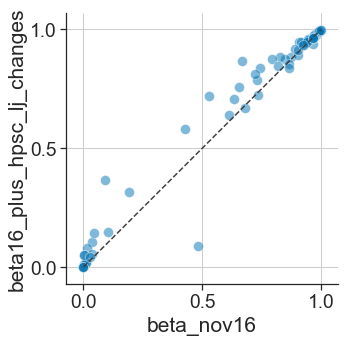

In [13]:
e_functions_to_plot = [
    #'talaris2014',
    #'ref2015',
    'beta_nov16',
    'beta16_plus_hpsc_lj_changes',
    #'beta_jan22',
    #'beta16',
    
    #'HH_run23A_step384',
    #'HH_run23A_step384_1d',
    #'HH_run23A_step384_dd2_elec_1a',
    #'HH_run23A_step384_dd2_elec_1b',
    #'HH_run23A_step384_dd_elec_1c',
    #'HH_run23B_sol_elec_dd2_simple_step169',
    #'HH_run25A_step402',
    #'HH_run25B_step311',
    #'HH_run26A_step258',
    # 'HH_run25B_step311_1d',
    #'HH_run26A_step258_1d',

    #'HH_run19A_step266',
    #'HH_run19A_step266_dd2_elec_5h_res0.5',
    #'HH_run19A_step266_dd2_elec_sol_5h_res0.5',
    #'HH_run19A_step266_dd_elec_5h_res0.5_pr2.5'
    #'HH_run19A_step266_dd_elec_5h_res0.5_pr2.5',
    #'HH_run19A_step266_dd_elec_sol_5h_res0.5_pr2.5'
    #'HH_run26B_step129_1e',
    #'HH_run26B_step129_1e3_14'
]
print(len(df))
for e_function in e_functions_to_plot:
    print(e_function, round(df[e_function].mean(), 3))
    assert sum(df[e_function].isnull()) == 0
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(
    [0, 1], [0, 1],
    c='0.25', ls='--'
)
sns.scatterplot(
    x=e_functions_to_plot[0],
    y=e_functions_to_plot[1],
    data=df, s=100, alpha=0.5
)
ax.grid()
ax.set(
    xticks=[0, 0.5, 1], yticks=[0, 0.5, 1],
    xlabel=e_functions_to_plot[0].replace(
        'HH_run19A_step266_', '19A'
    ).replace('HH_run22A_step292_', '22A'),
    ylabel=e_functions_to_plot[1].replace(
        'HH_run19A_step266_', ''
    ).replace(
        'HH_run25B_step311_1d', 'beta_jan22'
    )
)
#ax.set(xlabel='beta_nov16', ylabel='beta_jan22_dd_sol')
ax.set_aspect('equal', adjustable='box')
sns.despine()
plt.show()

To do:
* liquid-simulation test
    * how much do well depths change?
    * run with what I have now and see if they're still reasonable

* cart_ddg benchmark -- troubleshoot the errors

* skempi -- pretty much complete; look into problems

* look into outlier point (isn't great to begin with?)
* do this benchmark with the full set of decoys not just lower edge

In [14]:
df['diff'] = df[e_functions_to_plot[1]] - df[e_functions_to_plot[0]]
df.sort_values('diff', ascending=False)[['diff'] + e_functions_to_plot]

e_function,diff,beta_nov16,beta_jan22
native,,,
1KAC,0.887,0.017,0.904
1K4C,0.806,0.035,0.841
1KLU,0.805,0.002,0.807
1PVH,0.704,0.092,0.796
1WEJ,0.482,0.003,0.485
1MLC,0.461,0.003,0.464
1LFD,0.409,0.038,0.447
1E4K,0.386,0.000,0.386
BOYV,0.352,0.026,0.378


**Observations**
* Cases where new sol term helps
    * big change to landscape, making it funneled: 1ZHI, 1US7, 1FFW
    * helping, but not apparent from discrimination score:
        * 1NCA: eliminates most deep minima, leaving only a few shallow ones
* Cases where new sol term hurts
    * 2HRK: highly solvated interface (e.g., see H258)
    * 2AYO: almost certainly a highly solvated interface (see large cavities)
    * 1YVB: few unsats at interface, some cavities, but no waters that are resolved at least

e_function,beta_nov16,beta_jan22
native,,
1KAC,0.017,0.904


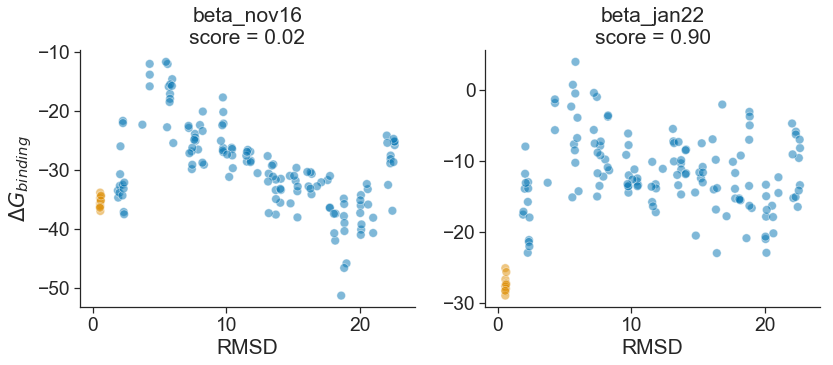

In [19]:
native = '1KAC'
display(df.loc[[native]][e_functions_to_plot])
(fig, axs) = plt.subplots(
    ncols=2, figsize=[12,5.5], sharex=True, #sharey=True
)
for (i, e_function) in enumerate(e_functions_to_plot):

    # Plot data from new benchmark
    data_i = new_ddg_df[
        (new_ddg_df['native'] == native) &
        (new_ddg_df['e_function'] == e_function)
    ].copy()
    metric = 'ddg' #
    data_i['decoy_type'] = data_i['rms'].apply(
        lambda x: 'native' if x < 1.5 else 'decoy'
    )
    data_i.sort_values('decoy_type', inplace=True)
    sns.scatterplot(
        x='rms', y=metric, data=data_i, ax=axs[i],
        hue='decoy_type', hue_order=['decoy', 'native'],
        s=75, alpha=0.5
    )
    ds = round(df.loc[native][e_function], 2)
    axs[i].set(
        title = f'{e_function}\nscore = {ds}',
        ylabel = '${\Delta}G_{binding}$',
        xlabel = 'RMSD'
    )
    axs[i].get_legend().remove()
axs[1].set(ylabel='', title='beta_jan22\nscore = %0.2f'%ds)
plt.tight_layout()
sns.despine()
plt.show()

In [82]:
e_function = 'HH_run23A_step384'
group = 'training_natives'
out_f1 = os.path.join(
    optE_results_dir,
    e_function,
    f'ds_{group}_{xml_name}_{relaxscript_name}.out'
)
out_f2 = os.path.join(
    optE_results_dir,
    e_function,
    f'ds_{group}_{xml_name}_{relaxscript_name}_v2.out'
)
df1 = pandas.read_csv(
    out_f1, sep='\s+', skiprows=2, names=['native', 'score']
)
df2 = pandas.read_csv(
    out_f2, sep='\s+', skiprows=2, names=['native', 'score']
)
data = df1.merge(df2, on='native', suffixes=['_v1', '_v2'])
data['native'] = data['native'].apply(os.path.basename)
data['diff'] = data['score_v1'] - data['score_v2']
data.sort_values('diff', inplace=True, ascending=True)
data.head()

,native,score_v1,score_v2,diff
23,1AKJ_ddg_relax_interface_cartminpack.sc,0.110003,0.470770,-0.360767
51,2JEL_ddg_relax_interface_cartminpack.sc,0.314515,0.509244,-0.194728
40,2PCC_ddg_relax_interface_cartminpack.sc,0.007070,0.190694,-0.183624
14,2MTA_ddg_relax_interface_cartminpack.sc,0.053716,0.220570,-0.166853
15,2ABZ_ddg_relax_interface_cartminpack.sc,0.058670,0.195570,-0.136900


Observations
* computation wrong for: 2AJF?

In [97]:
data_i.sort_values('ddg')[['ddg', 'rms', 'pdb']].head()

,ddg,rms,pdb
92,-18.458,18.114,HKH_2021_1NCA_run_1_complex.898_chain_B_6_0000...
62,-13.046,17.859,HKH_2021_1NCA_run_1_complex.592_chain_B_10_000...
118,-5.443,21.144,HKH_2021_1NCA_run_2_complex.245_chain_B_13_000...
3,-5.340,0.575,HKH_2021_1NCA_bound_native_6_xtal_0000100001_0...
0,-3.546,0.573,HKH_2021_1NCA_1NCA_bound_native_0000100001_000...


In [98]:
native = '1NCA'
e_function = 'HH_run23A_step384'
data = new_ddg_df[
    (new_ddg_df['native'] == native) &
    (new_ddg_df['e_function'] == e_function)
].copy()
data.sort_values('ddg', inplace=True)
display(data[['ddg', 'rms']].head())

working_dir = optE_results_dir
for f_id in ['complex']: # 'chainB'
    silent_file = f'{native}_{f_id}.out'
    tags = [data['description'].iloc[0][:-5]]
    design_utils.extract_pdbs_from_silent_file(
        working_dir,
        silent_file,
        extra_args=[
            '-in:file:silent_struct_type binary',
            f'-suffix _{f_id}'
        ],
        tags=tags,
        output_dir=False
    )
    time.sleep(5)
    for tag in tags:      
#        shutil.copy(f'{tag}_{f_id}.pdb', optE_results_dir)
        tag_bn = os.path.basename(tag)
        shutil.copy(
           f'{tag}.pdb',
           os.path.join(optE_results_dir, f'{tag_bn}_{f_id}.pdb')
        )

,ddg,rms
92,-18.458,18.114
62,-13.046,17.859
118,-5.443,21.144
3,-5.340,0.575
0,-3.546,0.573


In [79]:
os.path.join(optE_results_dir, f'{tag_bn}_{f_id}.pdb')

'results/silent_files_for_optE_ddg_noS/HKH_2021_2O8V_run_1_complex.99_chain_B_1_0000300003_0000001_0_0001_complex.pdb'

**Observations**
* HKH_2021_2O8V_run_1_complex.99_chain_B_1_0000300003_0000001_0_0001_complex.pdb: tricks 23A_step2and4, has several surface-exposed H-bonds/elec interactions

In [158]:
import importlib
design_utils = importlib.reload(design_utils)

In [159]:
working_dir = 'results/silent_files_for_optE_ddg_noS/beta_nov16/'
silent_file = '2HRK_complex_repack_interface_with_water_cartminpack.sc.out'
tags = []
design_utils.extract_pdbs_from_silent_file(
    working_dir,
    silent_file,
    extra_args=[
        '-in:file:silent_struct_type binary',
    ],
    tags=tags,
    output_dir=False,
    print_cmd=True,
)

/home/haddox/Rosetta/main/source/bin/extract_pdbs.linuxgccrelease -database /home/haddox/Rosetta/main/database/ -in:file:silent 2HRK_complex_repack_interface_with_water_cartminpack.sc.out -silent_read_through_errors -crystal_refine -in:file:silent_struct_type binary


Compare discrimination scores for the same energy function, but across different rescoring protocols

In [14]:
relaxscript_names = ['cartminpack', 'MonomerDesign2019']
xml_name = 'relax_interface' # 'repack_interface' # 'score_interface' # 
e_function = 'HH_run23A_step384_dd2_elec_1a' # 'HH_run23A_step384'
new_ddg_dfs = []
for relaxscript_name in relaxscript_names:
    
    # Make a list of score files from scoring native complexes
    complex_score_files = glob.glob(os.path.join(
        optE_results_dir,
        e_function,
        f'*_complex_{xml_name}_{relaxscript_name}.sc'
    ))
    if len(complex_score_files) == 0:
        continue

    # Loop over each of the above files, read in data for
    # the complex and each chain, and compute ddG
    all_scores_files = []
    n_datapoints = 0
    for complex_score_file in complex_score_files:

        # Read in data for complex
        new_ddg_df = pandas.read_csv(
            complex_score_file, skiprows=1, sep='\s+',
            #error_bad_lines=False
        )
        new_ddg_df['native'] = os.path.basename(complex_score_file)[:4]
        new_ddg_df['relaxscript_name'] = relaxscript_name

        # Get data for chains and merge with data for complex
        for chain in ['chainA', 'chainB']:
            chain_score_file = \
                complex_score_file.replace('complex', chain)
            df = pandas.read_csv(chain_score_file, skiprows=1, sep='\s+')
            df[chain] = df['total_score']
            new_ddg_df = new_ddg_df.merge(
                df[[chain, 'description']],
                on='description', how='inner'
            )

        # Compute ddG and write data to score file
        new_ddg_df['ddg'] = new_ddg_df['total_score'] - \
            new_ddg_df['chainA'] - new_ddg_df['chainB']
        new_ddg_df['rms'] = new_ddg_df['rmsd']
        output_score_file = complex_score_file.replace('complex', 'ddg')
        new_ddg_df.to_csv(output_score_file, index=False, sep='\t')
        new_ddg_dfs.append(new_ddg_df)
        n_datapoints += len(new_ddg_df)
        all_scores_files.append(output_score_file)
        
    print(e_function, n_datapoints)
    
new_ddg_df = pandas.concat(new_ddg_dfs, sort=False)
new_ddg_df['pdb'] = new_ddg_df['description'].apply(os.path.basename)

HH_run23A_step384_dd2_elec_1a 9150
HH_run23A_step384_dd2_elec_1a 9150


In [23]:
protocols = [
    #('score_interface', 'cartminpack'),
    #('repack_interface', 'cartminpack'),
    ('relax_interface', 'cartminpack'),
    ('relax_interface', 'MonomerDesign2019')
]
e_function = 'HH_run23A_step384_dd2_elec_1a' # 'HH_run23A_step384'
dfs = []
for (xml_name, relaxscript_name) in protocols:
    out_f = os.path.join(
        optE_results_dir,
        e_function,
        f'ds_{xml_name}_{relaxscript_name}.out'
    )
    if not os.path.isfile(out_f):
        continue
    df = pandas.read_csv(
        out_f, sep='\s+', skiprows=2, names=['native', 'score']
    )
    df['protocol'] = f'{xml_name}_{relaxscript_name}'
    df['native'] = df['native'].apply(
        lambda x: os.path.basename(x)[:4]
    )
    df['score'] = df['score'].apply(lambda x: round(x, 3))
    print(
        xml_name, relaxscript_name,
        len(df), round(df['score'].mean(), 2)
    )
    dfs.append(df)
df = pandas.concat(dfs, sort=False)
df = df.pivot(index='native', columns='protocol', values='score')

relax_interface cartminpack 61 0.75
relax_interface MonomerDesign2019 61 0.74


61
relax_interface_cartminpack 0.746
relax_interface_MonomerDesign2019 0.737


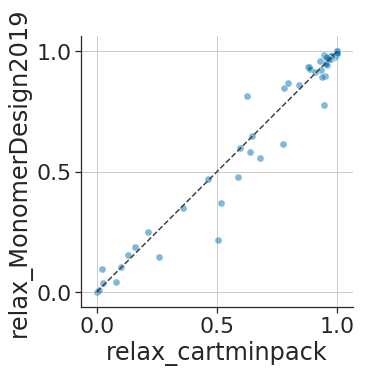

In [24]:
protocols_to_plot = [
    #'score_interface_cartminpack',
    #'repack_interface_cartminpack',
    'relax_interface_cartminpack',
    'relax_interface_MonomerDesign2019',
]
print(len(df))
for protocol in protocols_to_plot:
    print(protocol, round(df[protocol].mean(), 3))
    assert sum(df[protocol].isnull()) == 0
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(
    [0, 1], [0, 1],
    c='0.25', ls='--'
)
sns.scatterplot(
    x=protocols_to_plot[0],
    y=protocols_to_plot[1],
    data=df, s=50, alpha=0.5
)
ax.grid()
ax.set(
    xticks=[0, 0.5, 1], yticks=[0, 0.5, 1],
    xlabel=protocols_to_plot[0].replace('interface_', ''),
    ylabel=protocols_to_plot[1].replace('interface_', '')
)
#ax.set(ylabel='new variant')
ax.set_aspect('equal', adjustable='box')
sns.despine()
plt.show()

In [17]:
# relaxscript_names_to_plot = [
#     f'relax_interface_{relax_script}'
#     for relax_script in relaxscript_names
# ]
relaxscript_names_to_plot = [
    #'score_interface_cartminpack',
    #'repack_interface_cartminpack',
    'relax_interface_cartminpack',
    'relax_interface_MonomerDesign2019',
]
df['diff'] = \
    df[relaxscript_names_to_plot[1]] - df[relaxscript_names_to_plot[0]]
df.sort_values('diff', ascending=True)[['diff'] + relaxscript_names_to_plot]

protocol,diff,relax_interface_cartminpack,relax_interface_MonomerDesign2019
native,,,
1E6E,-0.290,0.631,0.341
2UUY,-0.128,0.494,0.366
2AYO,-0.077,0.761,0.684
1BJ1,-0.072,0.466,0.394
1XU1,-0.064,0.638,0.574
1SYX,-0.054,0.534,0.480
2O3B,-0.047,0.991,0.944
1HCF,-0.039,0.508,0.469
1AKJ,-0.033,0.062,0.029


Plot data for individual native

protocol,relax_interface_cartminpack,relax_interface_MonomerDesign2019
native,,
2AJF,0.518,0.371


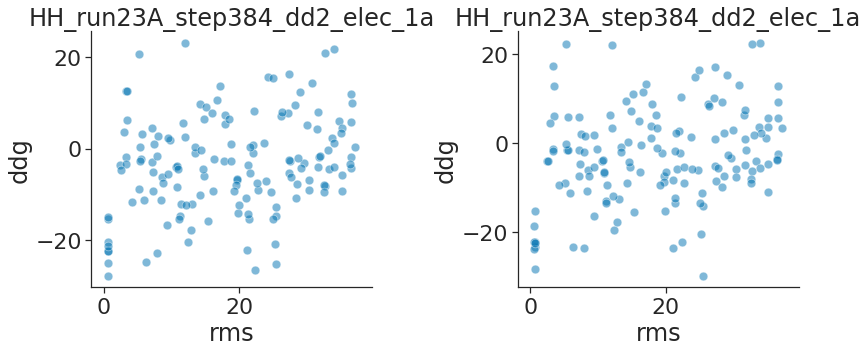

In [25]:
native = '2AJF'
display(df.loc[[native]][relaxscript_names_to_plot])
(fig, axs) = plt.subplots(
    ncols=2, figsize=[12,5], sharex=True, #sharey=True
)
for (i, relaxscript_name) in enumerate(relaxscript_names):

    # Plot data from new benchmark
    data_i = new_ddg_df[
        (new_ddg_df['native'] == native) &
        (new_ddg_df['relaxscript_name'] == relaxscript_name)
    ].copy()
    metric = 'ddg' #
    #df.sort_values('decoy_type', inplace=True)
    sns.scatterplot(
        x='rms', y=metric, data=data_i, ax=axs[i],
        #hue='decoy_type', hue_order=['decoy', 'native'],
        s=75, alpha=0.5
    )
    axs[i].set(
        title = e_function.replace('HH_run19A_step266_', '')
    )
    #plt.legend(bbox_to_anchor=(1,1))
#axs[1].set(ylabel='', title='new variant')
plt.tight_layout()
sns.despine()
plt.show()

In [92]:
data_i.sort_values('ddg')[['ddg', 'rms', 'pdb']].head()

,ddg,rms,pdb
67,-68.169,20.344,HKH_2021_1GLA_run_1_complex.65_chain_B_19_0000...
122,-39.528,24.909,HKH_2021_1GLA_run_2_complex.439_chain_B_13_000...
48,-38.669,26.631,HKH_2021_1GLA_run_1_complex.307_chain_B_15_000...
70,-31.294,15.896,HKH_2021_1GLA_run_1_complex.772_chain_B_7_0000...
8,-29.886,0.543,HKH_2021_1GLA_run_1_1GLA_bound_native_chain_B_...


In [91]:
new_ddg_df[
    new_ddg_df['description'].str.contains(
        'HKH_2021_1GLA_run_1_complex.65_chain_B_19'
    )
]

,SCORE:,total_score,score,rms,cart_bonded,dslf_fa13,fa_atr,fa_dun_dev,fa_dun_rot,fa_dun_semi,...,ref,rmsd,time,description,native,relaxscript_name,chainA,chainB,ddg,pdb
67,SCORE:,-394.859,-2174.063,20.344,470.295,0.0,-4091.265,52.694,311.428,533.391,...,82.669,20.344,995.0,/net/scratch/haddox/2021/ppi_benchmark/results...,1GLA,cartminpack,-228.65,-165.720,-0.489,HKH_2021_1GLA_run_1_complex.65_chain_B_19_0000...
67,SCORE:,-394.830,-2174.063,20.344,469.972,0.0,-4091.496,52.509,311.345,533.364,...,82.669,20.344,995.0,/net/scratch/haddox/2021/ppi_benchmark/results...,1GLA,MonomerDesign2019,-160.83,-165.831,-68.169,HKH_2021_1GLA_run_1_complex.65_chain_B_19_0000...


In [104]:
pandas.set_option('display.max_columns', None)

In [110]:
dirs = ['test_relax', 'test_relax_cmp']
dfs = []
for dir_i in dirs:
    f = f'{dir_i}/score.sc'
    df = pandas.read_csv(f, skiprows=1, sep='\s+')
    df['pdb'] = df['description'].apply(
        lambda x: os.path.basename(x).split('_')[-2]
    )
    df['dir'] = dir_i
    dfs.append(df)

df = pandas.concat(dfs, sort=False)
df[
    df['pdb'] == 'chainA'
].set_index(['pdb', 'dir'])

SCORE:  total_score  cart_bonded  dslf_fa13    fa_atr  \
pdb    dir                                                                     
chainA test_relax      SCORE:     -159.535      344.741        0.0 -3117.801   
       test_relax_cmp  SCORE:     -227.872      348.257        0.0 -3100.847   

                       fa_dun_dev  fa_dun_rot  fa_dun_semi  fa_elec_dd  \
pdb    dir                                                               
chainA test_relax          39.390     231.234      418.095   -1249.167   
       test_relax_cmp      40.908     230.199      416.331   -1244.609   

                       fa_intra_atr_xover4  fa_intra_rep_xover4   fa_rep  \
pdb    dir                                                                 
chainA test_relax                 -170.166               54.454  442.925   
       test_relax_cmp             -170.139               53.529  360.897   

                       fa_sol_bd  hbond_bb_sc  hbond_lr_bb  hbond_sc  \
pdb    dir                                                             
chainA test_relax       3207.362     -105.603     -153.588   -88.892   
       test_relax_cmp   3199.799     -105.594     -154.219   -88.737   

                       hbond_sr_bb  hxl_tors  lk_ball  lk_ball_bridge  \
pdb    dir                                                              
chainA test_relax         -231.828   113.711  835.358          -4.543   
       test_relax_cmp     -232.520   113.727  831.033          -4.561   

                       lk_ball_bridge_uncpl  lk_ball_iso   omega  p_aa_pp  \
pdb    dir                                                                  
chainA test_relax                   -38.109     -724.240  14.267 -111.354   
       test_relax_cmp               -38.326     -720.644  13.758 -110.803   

                       rama_prepro     ref   rmsd  \
pdb    dir                                          
chainA test_relax           68.341  65.876  0.627   
       test_relax_cmp       68.815  65.876  0.621   

                                                             description  
pdb    dir                                                                
chainA test_relax      test_relax/HKH_2021_1GLA_run_1_complex.65_chai...  
       test_relax_cmp  test_relax_cmp/HKH_2021_1GLA_run_1_complex.65_...

**Observations**
* For chainA, MonomerDesign2019 is leading to much worse energies
* For chainB and the complex, the energies are the same
* Why worse for chainA?
    * fa_rep is the major driver
    * can see examples of increased clashing
    * it is not a problem with previous sol_bd e-function variant. Changes include
        * parameter for ceiling of switching function
        * smaller probe size
* Why not worse for chainB and complex?
    * does it have something to do with depth?

* To do
    * 
    * try old relax protocol

In [96]:
native = '1GLA'
relaxscript_name = 'MonomerDesign2019'
data = new_ddg_df[
    (new_ddg_df['native'] == native) &
    (new_ddg_df['relaxscript_name'] == relaxscript_name)
].copy()
data.sort_values('ddg', inplace=True)
display(data[['ddg', 'rms', 'pdb']].head())

working_dir = optE_results_dir
for f_id in ['complex', 'chainA', 'chainB']:
    silent_file = f'{native}_{f_id}.out'
    tags = [data['description'].iloc[0][:-5]]
    design_utils.extract_pdbs_from_silent_file(
        working_dir,
        silent_file,
        extra_args=[
            '-in:file:silent_struct_type binary',
            f'-suffix _{f_id}'
        ],
        tags=tags,
        output_dir=False
    )
    time.sleep(5)
    for tag in tags:      
#        shutil.copy(f'{tag}_{f_id}.pdb', optE_results_dir)
        tag_bn = os.path.basename(tag)
        shutil.copy(
           f'{tag}.pdb',
           os.path.join(optE_results_dir, f'{tag_bn}_{f_id}.pdb')
        )

,ddg,rms,pdb
67,-68.169,20.344,HKH_2021_1GLA_run_1_complex.65_chain_B_19_0000...
122,-39.528,24.909,HKH_2021_1GLA_run_2_complex.439_chain_B_13_000...
48,-38.669,26.631,HKH_2021_1GLA_run_1_complex.307_chain_B_15_000...
70,-31.294,15.896,HKH_2021_1GLA_run_1_complex.772_chain_B_7_0000...
8,-29.886,0.543,HKH_2021_1GLA_run_1_1GLA_bound_native_chain_B_...


In [94]:
optE_results_dir

'results/silent_files_for_optE_ddg_noS/'

In [95]:
f'{tag_bn}_{f_id}.pdb'

'HKH_2021_1GLA_run_1_complex.65_chain_B_19_0000100001_0000001_0_0001_chainB.pdb'

In [6]:
working_dir = 'test_relax_dump/'
silent_file = 'Cartesian_multifunc_error_pose_after2.silent'
design_utils.extract_pdbs_from_silent_file(
    working_dir,
    silent_file,
    extra_args=[
        '-in:file:silent_struct_type binary',
        '-crystal_refine'
    ],
    tags=[],
    output_dir=False
)

Compute ddG with the ddG mover, with various protocols applied to the unbound state

In [31]:
# Protocols
xml_dict = {
    'compute_docking_score_ddg_no_repack' : \
        'scripts/compute_docking_score_ddg_no_repack.xml',
    'compute_docking_score_ddg_repack' : \
        'scripts/compute_docking_score_ddg_repack.xml',
    'compute_docking_score_ddg_relax' : \
        'scripts/compute_docking_score_ddg_relax.xml',
    'compute_ddg_and_total_score' : \
        'scripts/compute_ddg_and_total_score.xml'
}
relaxscript_dict = {
    'MonomerDesign2019' : 'MonomerDesign2019'
    #'cartminpack' : 'scripts/cartminpack.script',
    #'cartminpack_1_50' : 'scripts/cartminpack_1_50.script',
}

# Define input silent file
natives_to_drop_from_test = ['1IJK', '1K74', '2H7V', '1JMO']
native = '1NCA'
optE_results_dir = 'results/silent_files_for_optE_ddg_noS/'
input_silent_file = os.path.join(
    optE_results_dir,
    f'{native}_complex.out'
)

# Define energy function and output directory
e_function = 'beta_nov16'
(weights, flags, extra_args) = e_functions_dict[e_function]
output_dir = os.path.join(
    optE_results_dir,
    f'{e_function}/'
)
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

# Define protocol
relaxscript_name = 'MonomerDesign2019' # 'cartminpack'
relaxscript = relaxscript_dict[relaxscript_name]
for xml_name in xml_dict:
    
    if relaxscript_name == 'MonomerDesign2019':
        if xml_name != 'compute_docking_score_ddg_relax':
            continue
    
    # Define XML and output file
    xml = xml_dict[xml_name]
    output_file = os.path.join(
        output_dir,
        f'{native}_{xml_name}_{relaxscript_name}.sc'
    )

    # Assemble command
    cmd = ' '.join([
        '~/Rosetta/main/source/bin/rosetta_scripts.default.linuxgccrelease',
        f'-parser:protocol {xml}',
        '-parser:script_vars',
        f'wts={weights}',
        f'relaxscript={relaxscript}',
        f'-in:file:silent {input_silent_file}',
        '-in:file:silent_struct_type binary',
        f'-score:weights {weights}',
        '-crystal_refine true',
        f'-in:file:native data/natives/{native}_bound_native.pdb',
        '-silent_read_through_errors',
        f'-out:file:score_only {output_file}',
        #'-mute all'
    ])
    if flags:
        cmd += f' @{flags}'
    if extra_args:
        cmd += ' ' + ' '.join(extra_args)

    # Submit job
    sbatch_file_name = output_file.replace('.sc', '.sbatch')
    if not os.path.isfile(sbatch_file_name):
        design_utils.WriteSbatchFile(
            sbatch_file_name,
            command=cmd,
            queue_type='medium',
            memory='2g'
        )
        ! sbatch {sbatch_file_name}

Read in and plot data

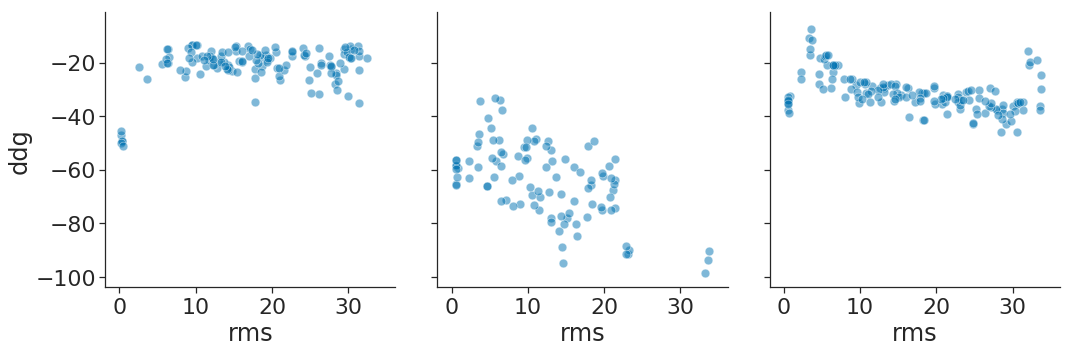

In [32]:
native = '1NCA'
e_function = 'beta_nov16'
xml_name = 'compute_docking_score_ddg_relax' # 'compute_ddg_and_total_score' #
relaxscript_name = 'MonomerDesign2019'

(fig, axs) = plt.subplots(
    ncols=3, figsize=[15,5], sharex=True, sharey=True
)

# Plot data from old benchmark
old_score_file = os.path.join(
    '/home/haddox/2019/optE_eval/results/beta_nov16/',
    f'nolayer_nostab_0/opt_1/{native}.docking.out'
)
df = pandas.read_csv(old_score_file, sep='\s+', skiprows=1)
df['decoy_type'] = 'decoy'
metric = 'ddg'
data = df[
    (df[metric] < df[metric].quantile(0.8)) &
    ~(df[metric].isnull())
].copy()
sns.scatterplot(
    x='rms', y='ddg', data=data, ax=axs[0],
    #hue='decoy_type', hue_order=['decoy', 'native'],
    s=75, alpha=0.5
)

# Plot data from short ddg protocol
output_file = os.path.join(
    optE_results_dir,
    f'{e_function}/'
    f'{native}_{xml_name}_{relaxscript_name}.sc'
)
df = pandas.read_csv(output_file, sep='\s+', skiprows=1)
df['decoy_type'] = df['description'].apply(
    lambda x: 'native' if 'xtal' in x else 'decoy'
)
if 'total_score_chain_A' in df.columns.values:
    df['ddg_from_parts'] = df['total_score'] - \
        df['total_score_chain_A'] - df['total_score_chain_B']
metric = 'ddg' # 'ddg_from_parts' # 
df = df[df[metric] > -100]
df.sort_values('decoy_type', inplace=True)
sns.scatterplot(
    x='rms', y=metric, data=df, ax=axs[1],
    #hue='decoy_type', hue_order=['decoy', 'native'],
    s=75, alpha=0.5
)

# Plot data from new benchmark
df = ddg_df[
    (ddg_df['native'] == native) &
    (ddg_df['description'].isin(pdbs_for_optE_dict[native]))
].copy()
metric = 'ddg'
df.sort_values('decoy_type', inplace=True)
sns.scatterplot(
    x='rms', y=metric, data=df, ax=axs[2],
    #hue='decoy_type', hue_order=['decoy', 'native'],
    s=75, alpha=0.5
)

plt.tight_layout(w_pad=3)
sns.despine()
plt.show()

In [33]:
working_dir = 'results/silent_files_for_optE_ddg_noS/'
silent_file = '1NCA_complex.out'
tags = ['/net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top1000_noS/HKH_2021_1NCA_run_1_complex.158_chain_B_6_0000100001_0000001_0_0001']
design_utils.extract_pdbs_from_silent_file(
    working_dir,
    silent_file,
    extra_args=[
        '-in:file:silent_struct_type binary',
    ],
    tags=tags,
    output_dir=False,
    print_cmd=True,
)

/home/haddox/Rosetta/main/source/bin/extract_pdbs.linuxgccrelease -database /home/haddox/Rosetta/main/database/ -in:file:silent 1NCA_complex.out -silent_read_through_errors -crystal_refine -in:file:tags /net/scratch/haddox/2021/ppi_benchmark/results/silent_files_binned_top1000_noS/HKH_2021_1NCA_run_1_complex.158_chain_B_6_0000100001_0000001_0_0001 -in:file:silent_struct_type binary
